### Bibliothèque

In [ ]:
import pandas as pd
import numpy as np
from google.colab import drive
drive.mount('/content/drive')
import matplotlib.pyplot as plt
import seaborn as sns

Mounted at /content/drive


# V2: Analyse Exploratoire 12 régions

## Lecture du csv dans un dataframe

Vous pouvez lire directement le fichier concaténé avec toutes les régions

In [ ]:
#"https://drive.google.com/file/d/1-GG90aGUDMT81iFd1OqD5D1YtV8T3eIr/view?usp=drive_link"

df_conso_group = pd.read_csv("https://drive.google.com/uc?export=view&id=1-GG90aGUDMT81iFd1OqD5D1YtV8T3eIr", sep = ',')

## 1 - Classement des Régions - Energie Moyenne par point de soutirage

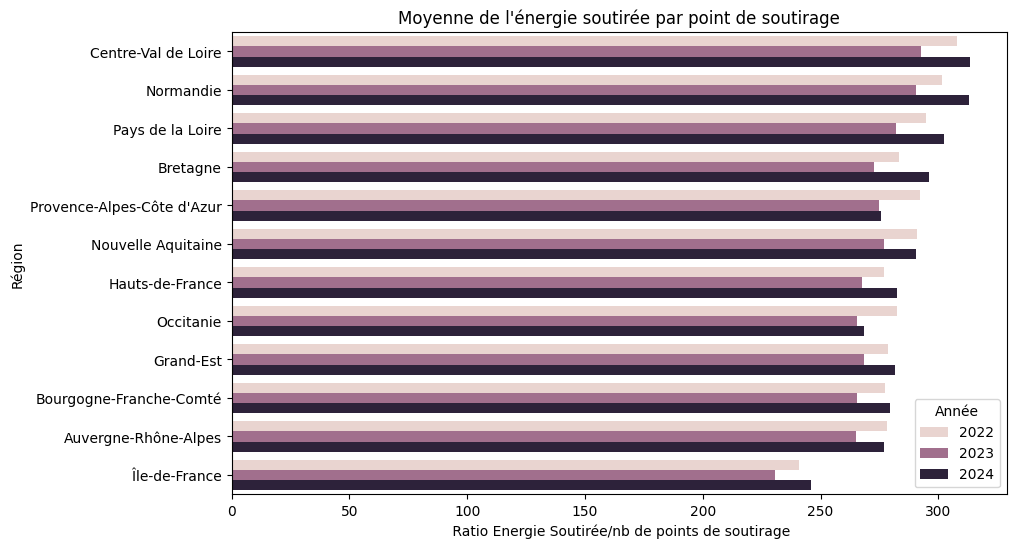

In [ ]:
# Histogramme Rapport entre l'energie consommée/ Nb de points de soutirage par région par annee

# Grouper les données par région et par année
#ajouter une coloone ratio energie/nb points= le rapport energie soutirée/ Nb de points soutirage
df_conso_group['ratio'] = df_conso_group['ENERGIE_SOUTIREE'] / df_conso_group['NB_POINTS_SOUTIRAGE']

# Grouper les données par région et calculer le ratio moyen par region
df_grouped_by_year = df_conso_group.groupby(['Année', 'REGION'])['ratio'].mean().reset_index()

# Ordonner les régions par ordre décroissant de ratio moyen
df_grouped_by_year = df_grouped_by_year.sort_values(by='ratio', ascending=False)

# Créer l'histogramme
plt.figure(figsize=(10, 6))
#barplot horizontal

ax = sns.barplot(y='REGION', x='ratio', hue='Année', data=df_grouped_by_year)

# # Ajouter les annotations des chiffres au-dessus des barres
# for p in ax.patches:
#     ax.annotate(f'{p.get_height():.0f}',
#                 (p.get_x() + p.get_width() / 2., p.get_height()),
#                 ha='center', va='center',
#                 xytext=(0, 10),
#                 textcoords='offset points')

plt.title("Moyenne de l'énergie soutirée par point de soutirage")
plt.ylabel('Région')
plt.xlabel(' Ratio Energie Soutirée/nb de points de soutirage')
plt.show()


Les régions qui arrivent en tête en termes de consommation moyenne par point de soutirage ne sont pas forcemment celles qui ont le plus de points de soutirage (abonnements actifs Puissance <= 36KVA).

Comment expliquer ça ?

"Selon cette étude, ce sont "les régions du Centre-Val de Loire et de Normandie", qui ont consommé le plus d'électricité en 2021. Ce qui s'expliquerait par le fait "qu’elles sont aussi les plus équipées en chaudières électriques", assure l'entreprise spécialisée. " https://www.lanouvellerepublique.fr/a-la-une/carte-voici-les-departements-francais-ou-l-on-consomme-le-plus-d-electricite


## 1B - Classement des Régions - Energie Moyenne par point de soutirage

,REGION,ratio
3,Centre-Val de Loire,303.011148
6,Normandie,299.383450
9,Pays de la Loire,291.145219
7,Nouvelle Aquitaine,285.302052
10,Provence-Alpes-Côte d'Azur,281.770317
2,Bretagne,281.579517
4,Grand-Est,275.195575
5,Hauts-de-France,274.297231
1,Bourgogne-Franche-Comté,273.065957
8,Occitanie,272.821139


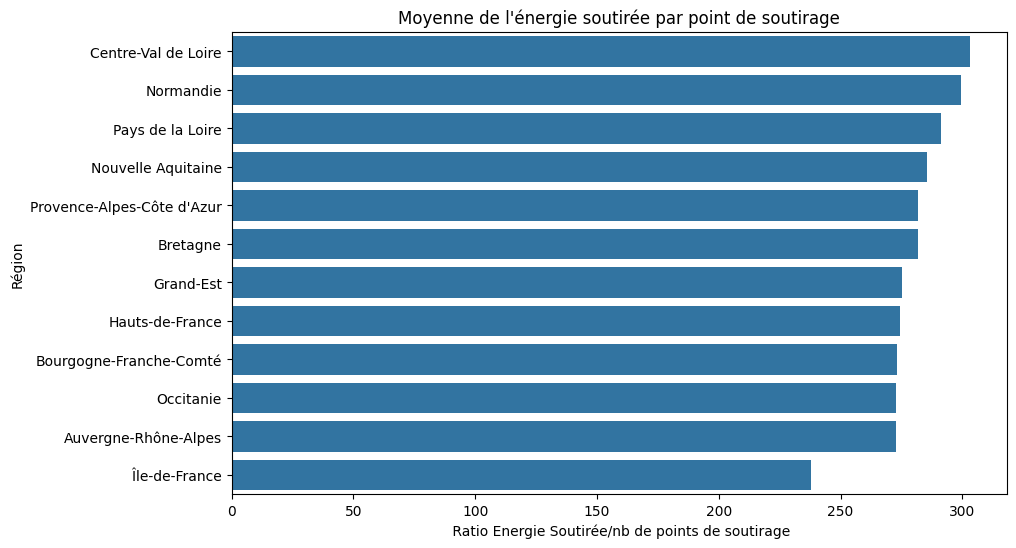

In [ ]:
# Histogramme Rapport entre l'energie consommée/ Nb de points de soutirage par région par annee

# Grouper les données par région et par année
#ajouter une coloone ratio energie/nb points= le rapport energie soutirée/ Nb de points soutirage
df_conso_group['ratio'] = df_conso_group['ENERGIE_SOUTIREE'] / df_conso_group['NB_POINTS_SOUTIRAGE']

# # Grouper les données par région et calculer le ratio moyen par region
df_grouped_by_region = df_conso_group.groupby(['REGION'])['ratio'].mean().reset_index()

# Ordonner les régions par ordre décroissant de ratio moyen
df_conso_group_sorted = df_grouped_by_region.sort_values(by='ratio', ascending=False)
display(df_conso_group_sorted)
# Créer l'histogramme
plt.figure(figsize=(10, 6))
#barplot horizontal

ax = sns.barplot(y='REGION', x='ratio', data=df_conso_group_sorted)

# # Ajouter les annotations des chiffres au-dessus des barres
# for p in ax.patches:
#     ax.annotate(f'{p.get_height():.0f}',
#                 (p.get_x() + p.get_width() / 2., p.get_height()),
#                 ha='center', va='center',
#                 xytext=(0, 10),
#                 textcoords='offset points')

plt.title("Moyenne de l'énergie soutirée par point de soutirage")
plt.ylabel('Région')
plt.xlabel(' Ratio Energie Soutirée/nb de points de soutirage')
plt.show()


Les régions qui arrivent en tête en termes de consommation moyenne par point de soutirage ne sont pas forcemment celles qui ont le plus de points de soutirage (abonnements actifs Puissance <= 36KVA).

Comment expliquer ça ?

"Selon cette étude, ce sont "les régions du Centre-Val de Loire et de Normandie", qui ont consommé le plus d'électricité en 2021. Ce qui s'expliquerait par le fait "qu’elles sont aussi les plus équipées en chaudières électriques", assure l'entreprise spécialisée. " https://www.lanouvellerepublique.fr/a-la-une/carte-voici-les-departements-francais-ou-l-on-consomme-le-plus-d-electricite


## 2- HIST - Répartition de la consommation énergétique au fil du temps 
- TOP 3 des régions

In [ ]:
# Ajouter des colonnes pour l'année et le mois

# df_conso_group['DATE'] = pd.to_datetime(df_conso_group['DATE'])

df_conso_group['Année'] = pd.to_datetime(df_conso_group['DATE']).dt.year # convert the 'DATE' column to datetime
df_conso_group['Mois'] = pd.to_datetime(df_conso_group['DATE']).dt.month


df_conso_group['Année'].unique()


array([2022, 2023, 2024], dtype=int32)

In [ ]:
df_conso_group.head()


,DATE,REGION,CODE,NB_POINTS_SOUTIRAGE,ENERGIE_SOUTIREE,Année,Mois
0,2022-01-01,Auvergne-Rhône-Alpes,84,231089068,8.296446e+10,2022,1
1,2022-01-01,Bourgogne-Franche-Comté,27,82167622,2.837146e+10,2022,1
2,2022-01-01,Bretagne,53,103421842,3.640157e+10,2022,1
3,2022-01-01,Centre-Val de Loire,24,68742328,2.729271e+10,2022,1
4,2022-01-01,Grand-Est,44,145625744,4.850288e+10,2022,1


## 3 - Conso electrique au fils du temps

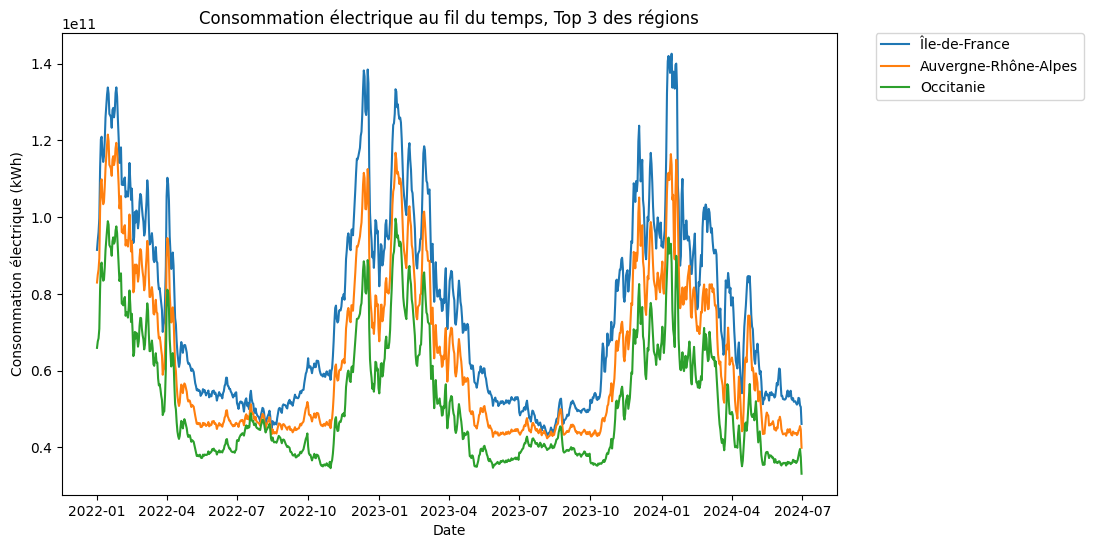

In [ ]:

#courbes de la consommation électrique au fil du temps, par région
#Top 3 des régions qui consomment le plus d'énergie
df_top_3_regions = df_conso_group.groupby('REGION')['ENERGIE_SOUTIREE'].sum().nlargest(3).index

df_conso_top_3_regions = df_conso_group[df_conso_group['REGION'].isin(df_top_3_regions)]
#ordonner par ordre décroissant
df_conso_top_3_regions = df_conso_top_3_regions.sort_values(by='ENERGIE_SOUTIREE', ascending=False)
fig, ax = plt.subplots(figsize=(10, 6))
sns.lineplot(data=df_conso_top_3_regions, x='DATE', y='ENERGIE_SOUTIREE', hue='REGION')
plt.title('Consommation électrique au fil du temps, Top 3 des régions')
plt.xlabel('Date')
plt.ylabel('Consommation électrique (kWh)')
#positionner légende en haut du graphique
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()



## 3- Consommation électrique par mois - Année type

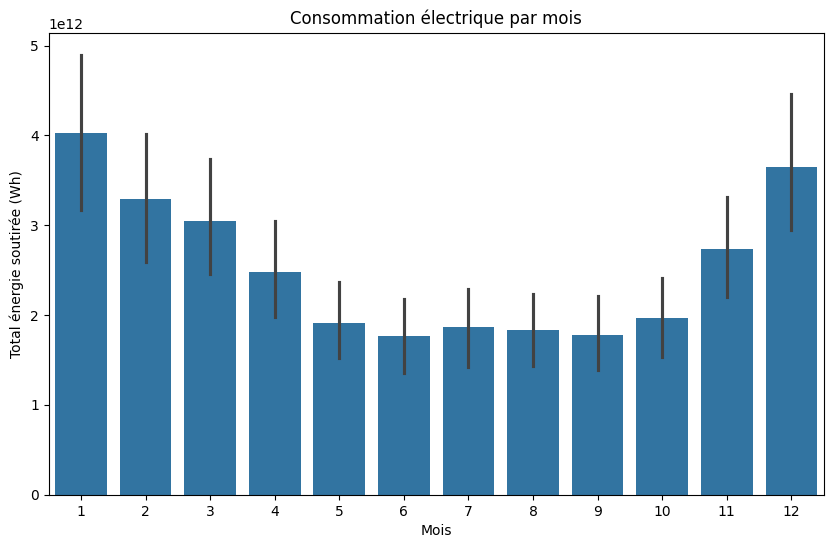

In [ ]:
# Créer l'histogramme pour comparer deux régions par mois

# Grouper les données par région et par mois
#garder uniquement les années differentes de 2024
df_conso_group_full = df_conso_group[df_conso_group['Année'] != 2024]
df_grouped_by_month = df_conso_group_full.groupby(['Mois', 'REGION'])['ENERGIE_SOUTIREE'].sum().reset_index()
df_grouped_by_month = df_grouped_by_month.sort_values(by='ENERGIE_SOUTIREE', ascending=True)
# Créer l'histogramme
plt.figure(figsize=(10, 6))
sns.barplot(x='Mois', y='ENERGIE_SOUTIREE',
            #hue='REGION',
            data=df_grouped_by_month)
plt.title('Consommation électrique par mois')
plt.xlabel('Mois')
plt.ylabel('Total énergie soutirée (Wh)')
plt.show()


Printemps=> descente, Automne=> Augmentation

A voir avec le graphique par mois/par année pour eviter les années incomplètes

## Répartition de la consommation énergétique par mois

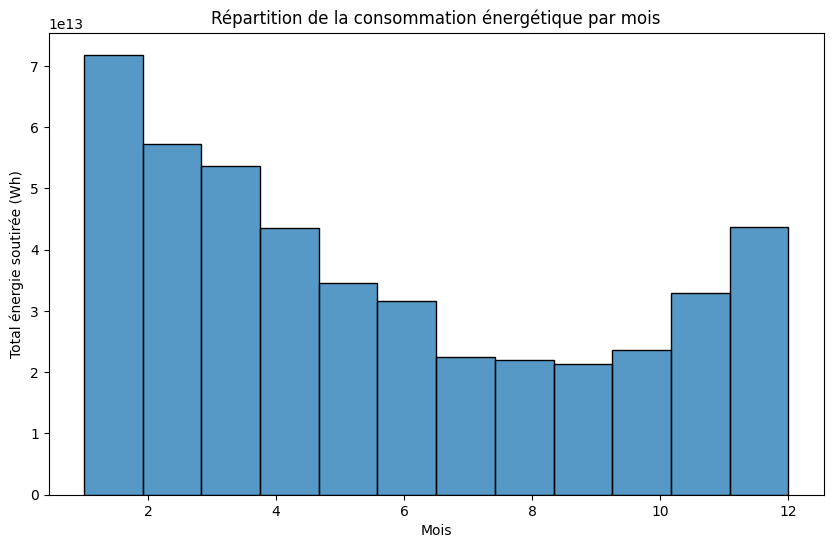

In [ ]:
# Répartition de la consommation énergétique par mois
#Prendre suelement 2022 et 2023 (complètes)

df_conso_group_2022_2024 = df_conso_group[df_conso_group['Année'].isin([2022, 2023])]
plt.figure(figsize=(10, 6))
sns.histplot(data=df_conso_group, x='Mois', weights='ENERGIE_SOUTIREE', bins=12, kde=False)
plt.title("Répartition de la consommation énergétique par mois")
plt.xlabel("Mois")
plt.ylabel("Total énergie soutirée (Wh)")
plt.show()

##  HIST - énergie moyenne par point de soutirage, par région, par année

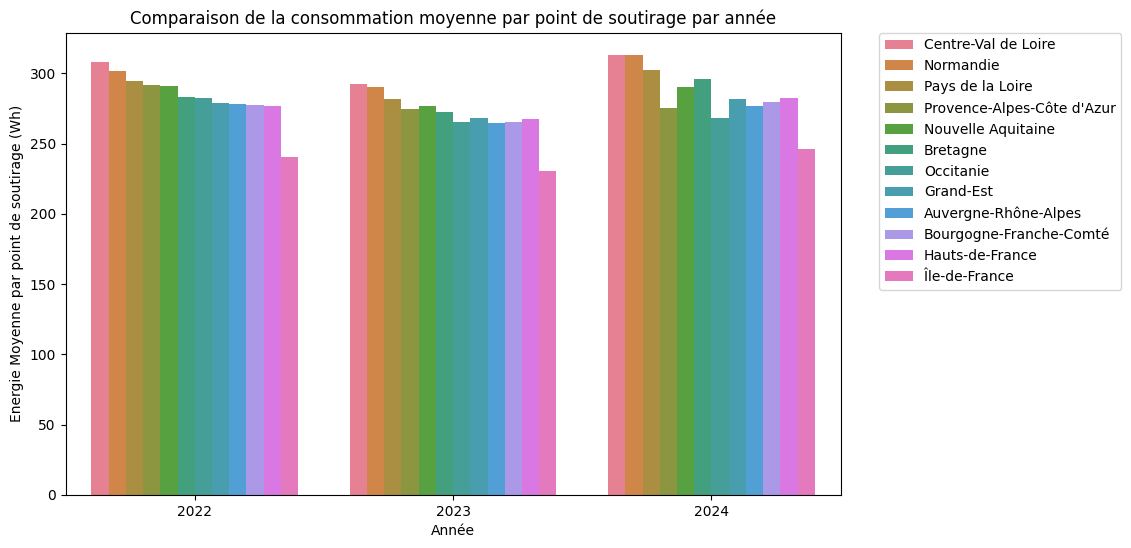

In [ ]:
# Créer l'histogramme pour comparer deux régions par année

# Filtrer les données pour les deux régions
#df_deux_regions = df_conso_group[df_conso_group['REGION'].isin(['Hauts-de-France', 'Centre-Val de Loire'])]

# Grouper les données par région et calculer le ratio moyen par region
df_grouped_by_year = df_conso_group.groupby(['Année', 'REGION'])['ratio'].mean().reset_index()

# Ordonner les régions par ordre décroissant de ratio moyen
df_grouped_by_year = df_grouped_by_year.sort_values(by='ratio', ascending=False)


# Créer l'histogramme
plt.figure(figsize=(10, 6))
ax = sns.barplot(x='Année', y='ratio', hue='REGION', data=df_grouped_by_year)

# # Ajouter les annotations des chiffres au-dessus des barres
# for p in ax.patches:
#     ax.annotate(f'{p.get_height():.0f}',
#                 (p.get_x() + p.get_width() / 2., p.get_height()),
#                 ha='center', va='center',
#                 xytext=(0, 10),
#                 textcoords='offset points')

plt.title('Comparaison de la consommation moyenne par point de soutirage par année')
plt.xlabel('Année')
plt.ylabel('Energie Moyenne par point de soutirage (Wh)')
#positionner la légénde
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()



Le classement du TOP 5 semble inchagé dans les 3 années

## **HISTOGRAMME - Comparaison des  régions par total énergie soutirée**

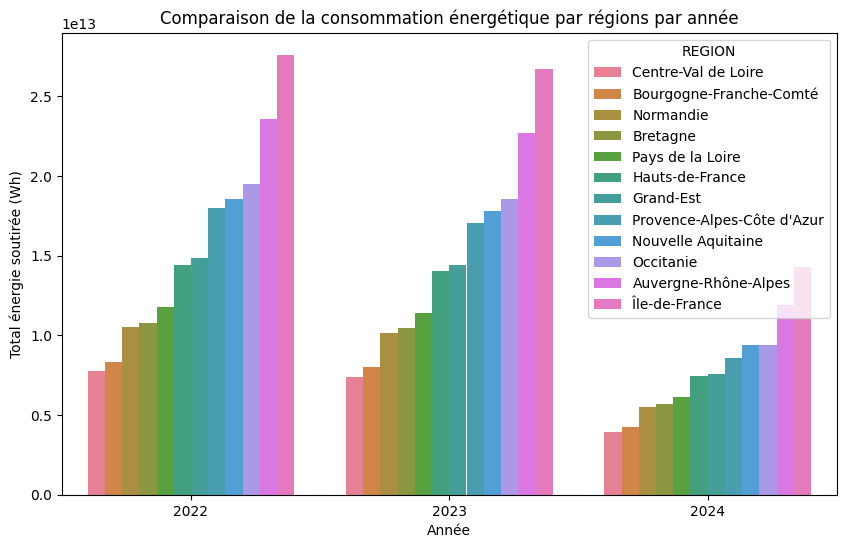

In [ ]:
# Créer l'histogramme pour comparer deux régions par année

# Filtrer les données pour les deux régions
#df_deux_regions = df_conso_group[df_conso_group['REGION'].isin(['Hauts-de-France', 'Centre-Val de Loire'])]

# Grouper les données par région et par année
df_grouped_by_year = df_conso_group.groupby(['Année', 'REGION'])['ENERGIE_SOUTIREE'].sum().reset_index()
#ordonner les régions par ordre croissant d' ENERGIE_SOUTIREE
df_grouped_by_year = df_grouped_by_year.sort_values(by='ENERGIE_SOUTIREE', ascending=True)
# Créer l'histogramme
plt.figure(figsize=(10, 6))
ax = sns.barplot(x='Année', y='ENERGIE_SOUTIREE', hue='REGION', data=df_grouped_by_year)

# # Ajouter les annotations des chiffres au-dessus des barres
# for p in ax.patches:
#     ax.annotate(f'{p.get_height():.0f}',
#                 (p.get_x() + p.get_width() / 2., p.get_height()),
#                 ha='center', va='center',
#                 xytext=(0, 10),
#                 textcoords='offset points')

plt.title('Comparaison de la consommation énergétique par régions par année')
plt.xlabel('Année')
plt.ylabel('Total énergie soutirée (Wh)')
plt.show()



La taille des régions (nb de points de soutirage = souscriptions) reste stable au cours des années

## Conso par année (trop peu d'années)

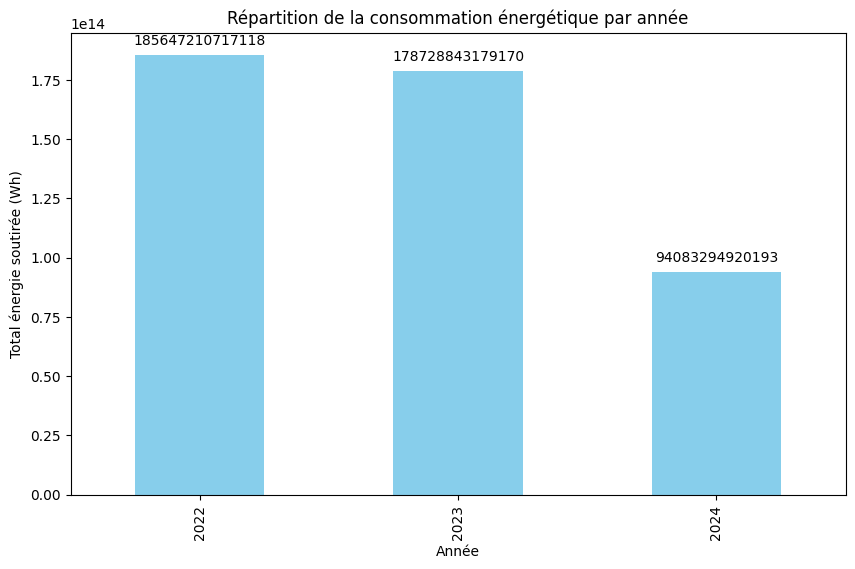

In [ ]:
plt.figure(figsize=(10, 6))
ax = df_conso_group.groupby('Année')['ENERGIE_SOUTIREE'].sum().plot(kind='bar', color='skyblue')

# Ajouter les annotations des chiffres au-dessus des barres
for p in ax.patches:
    ax.annotate(f'{p.get_height():.0f}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center',
                xytext=(0, 10),
                textcoords='offset points')

plt.title('Répartition de la consommation énergétique par année')
plt.xlabel('Année')
plt.ylabel('Total énergie soutirée (Wh)')
plt.show()

L'année 2024 n'etant pas complétes=> difficile d'analyser les tendances


## HISTOGRAMME - Comparaison des  régions par total Energie consommée

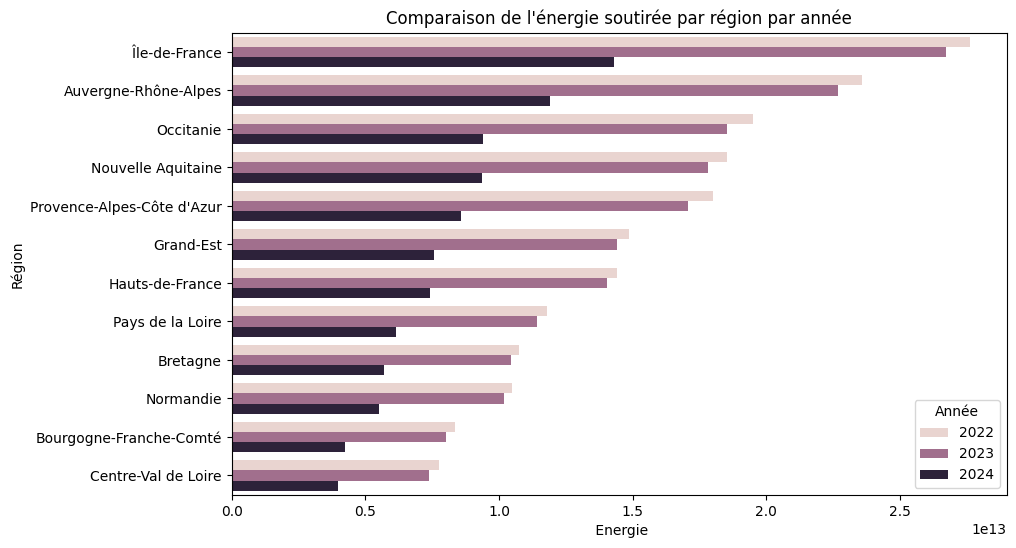

In [ ]:
# Créer l'histogramme pour comparer deux régions par année

# Filtrer les données pour les deux régions
#df_deux_regions = df_conso_group[df_conso_group['REGION'].isin(['Hauts-de-France', 'Centre-Val de Loire'])]

# Grouper les données par région et par année
df_grouped_by_year = df_conso_group.groupby(['Année', 'REGION'])['ENERGIE_SOUTIREE'].sum().reset_index()
#ordonner les régions par ordre décroissant d' ENERGIE_SOUTIREE
df_grouped_by_year = df_grouped_by_year.sort_values(by='ENERGIE_SOUTIREE', ascending=False)
# Créer l'histogramme
plt.figure(figsize=(10, 6))
#barplot horizontal

ax = sns.barplot(y='REGION', x='ENERGIE_SOUTIREE', hue='Année', data=df_grouped_by_year)

# # Ajouter les annotations des chiffres au-dessus des barres
# for p in ax.patches:
#     ax.annotate(f'{p.get_height():.0f}',
#                 (p.get_x() + p.get_width() / 2., p.get_height()),
#                 ha='center', va='center',
#                 xytext=(0, 10),
#                 textcoords='offset points')

plt.title("Comparaison de l'énergie soutirée par région par année")
plt.ylabel('Région')
plt.xlabel(' Energie')
plt.show()



## **HISTOGRAMME - Comparaison des  régions par Nb de points de soutirage**

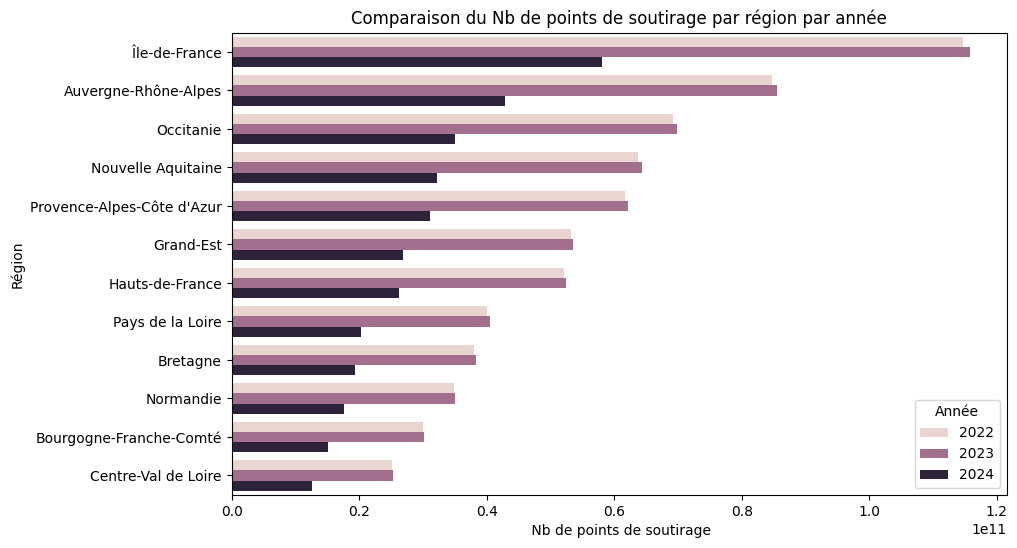

In [ ]:
# Créer l'histogramme pour comparer deux régions par année

# Filtrer les données pour les deux régions
#df_deux_regions = df_conso_group[df_conso_group['REGION'].isin(['Hauts-de-France', 'Centre-Val de Loire'])]

# Grouper les données par région et par année
df_grouped_by_year = df_conso_group.groupby(['Année', 'REGION'])['NB_POINTS_SOUTIRAGE'].sum().reset_index()
#ordonner les régions par ordre croissant d' ENERGIE_SOUTIREE
df_grouped_by_year = df_grouped_by_year.sort_values(by='NB_POINTS_SOUTIRAGE', ascending=False)
# Créer l'histogramme
plt.figure(figsize=(10, 6))
#barplot horizontal

ax = sns.barplot(y='REGION', x='NB_POINTS_SOUTIRAGE', hue='Année', data=df_grouped_by_year)

# # Ajouter les annotations des chiffres au-dessus des barres
# for p in ax.patches:
#     ax.annotate(f'{p.get_height():.0f}',
#                 (p.get_x() + p.get_width() / 2., p.get_height()),
#                 ha='center', va='center',
#                 xytext=(0, 10),
#                 textcoords='offset points')

plt.title('Comparaison du Nb de points de soutirage par région par année')
plt.ylabel('Région')
plt.xlabel(' Nb de points de soutirage')
plt.show()



##Comparaison de la consommation énergétique entre régions par mois

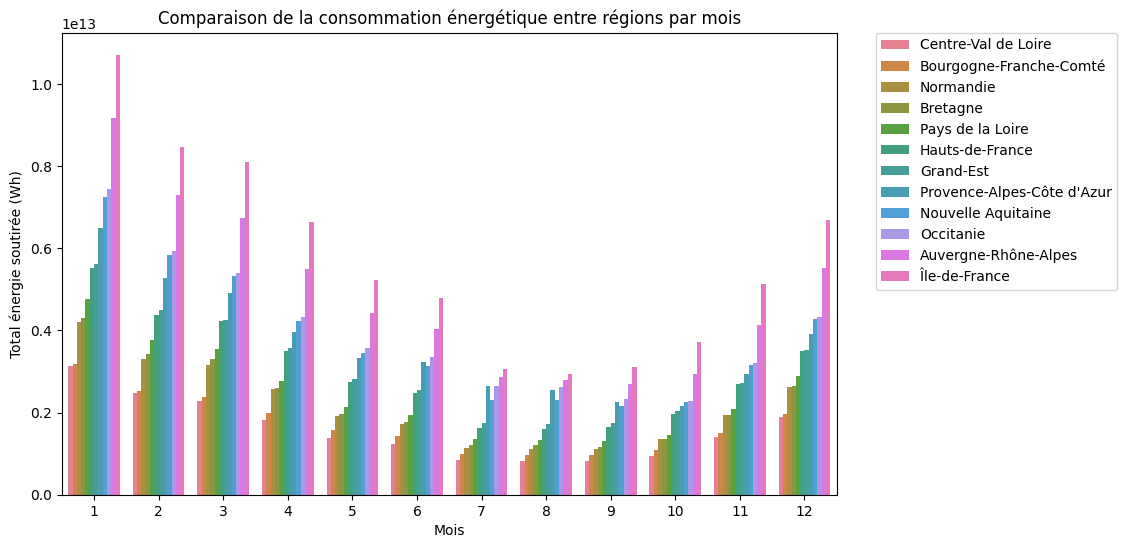

In [ ]:
# Créer l'histogramme pour comparer deux régions par mois

# Grouper les données par région et par mois
df_grouped_by_month = df_conso_group.groupby(['Mois', 'REGION'])['ENERGIE_SOUTIREE'].sum().reset_index()
df_grouped_by_month = df_grouped_by_month.sort_values(by='ENERGIE_SOUTIREE', ascending=True)
# Créer l'histogramme
plt.figure(figsize=(10, 6))
sns.barplot(x='Mois', y='ENERGIE_SOUTIREE', hue='REGION', data=df_grouped_by_month)
plt.title('Comparaison de la consommation énergétique entre régions par mois')
#positionner la légende au dessus
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.xlabel('Mois')
plt.ylabel('Total énergie soutirée (Wh)')
plt.show()


Printemps=> descente, Automne=> Augmentation

! Attention: à partir de Juillet, il manque les données de 2024

## CAMEMBERT (PIE CHART) - total energie
avec mention du Nb de points de soutirage par région

In [ ]:
import plotly.express as px
# afficher deux camemberts cote à cote

# Grouper les données par région pour obtenir la somme de la Total énergie et le nombre de points de soutirage
df_grouped_pie = df_conso_group.groupby('REGION')[['ENERGIE_SOUTIREE', 'NB_POINTS_SOUTIRAGE']].sum().reset_index()

# Créer le camembert avec la Total énergie soutirée et mention du Nb de points de soutirage dans le hover

fig = px.pie(df_grouped_pie,
             names='REGION',
             values='ENERGIE_SOUTIREE',
             hover_data=['NB_POINTS_SOUTIRAGE'],
             title='Répartition de la Total énergie soutirée par Région',
             labels={'Total énergie soutirée (Wh)': 'Énergie (Wh)'})

# Ajouter un formatage au hover pour afficher le nombre de points de soutirage
fig.update_traces(textinfo='percent+label',
                  hovertemplate='<b>%{label}</b><br>Total énergie: %{value:,} Wh<br>Nb points de soutirage: %{customdata[0]:,}')

# Affichage du graphique
fig.show()


##CAMEMBERT (PIE CHART) - total Nb de points de soutirage par région

In [ ]:
import plotly.express as px
# afficher deux camemberts cote à cote

# Grouper les données par région pour obtenir la somme de la Total énergie et le nombre de points de soutirage
df_grouped_pie = df_conso_group.groupby('REGION')[['NB_POINTS_SOUTIRAGE']].sum().reset_index()

# Créer le camembert avec la Total énergie soutirée et mention du Nb de points de soutirage dans le hover

fig = px.pie(df_grouped_pie,
             names='REGION',
             values='NB_POINTS_SOUTIRAGE',
            #  hover_data=['NB_POINTS_SOUTIRAGE'],
             title='Répartition du Nb de points de soutirage par Région',
             labels='REGION'
)
#Afficher le nom des régions
fig.update_traces(textposition='inside', textinfo='percent+label')

# # Ajouter un formatage au hover pour afficher le nombre de points de soutirage
# fig.update_traces(textinfo='percent+label',
#                   hovertemplate='<b>%{label}</b><br>Total énergie: %{value:,} Wh<br>Nb points de soutirage: %{customdata[0]:,}')

# Affichage du graphique
fig.show()

In [ ]:
import plotly.express as px

# Grouper les données par mois pour obtenir la somme de la Total énergie soutirée et le nombre de points de soutirage
df_grouped_pie_month = df_conso_group.groupby('Mois')[['ENERGIE_SOUTIREE', 'NB_POINTS_SOUTIRAGE']].sum().reset_index()

# Créer le camembert avec la Total énergie soutirée et mention du Nb de points de soutirage dans le hover
fig_month = px.pie(df_grouped_pie_month,
                   names='Mois',
                   values='ENERGIE_SOUTIREE',
                   hover_data=['NB_POINTS_SOUTIRAGE'],
                   title='Répartition de la Total énergie soutirée par Mois',
                   labels={'Total énergie soutirée (Wh)': 'Énergie (Wh)'})

# Ajouter un formatage au hover pour afficher le nombre de points de soutirage
fig_month.update_traces(textinfo='percent+label',
                        hovertemplate='<b>%{label}</b><br>Total énergie: %{value:,} Wh<br>Nb points de soutirage: %{customdata[0]:,}')

# Affichage du graphique
fig_month.show()


A differencier para mois et para année (car années incompletes)

# Récupération des Nouvelles Données de conso électrique

## Création du dataframe avec toutes les régions

In [ ]:

#HDF
df_conso_HDF_2022 = pd.read_csv("https://drive.google.com/uc?export=view&id=1SXj_-91WRiohuMAYVo3ptvsG1MR9eILk", sep = ';')
#https://drive.google.com/file/d/1SXj_-91WRiohuMAYVo3ptvsG1MR9eILk/view?usp=drive_link
df_conso_HDF_2023 = pd.read_csv("https://drive.google.com/uc?export=view&id=10KyP7i1KHxnOocDZFlNGiHrTA7947hBA", sep = ';')
#https://drive.google.com/file/d/10KyP7i1KHxnOocDZFlNGiHrTA7947hBA/view?usp=drive_link
df_conso_HDF_2024 = pd.read_csv("https://drive.google.com/uc?export=view&id=1Em6LeE-0cz-vt9NBTz2UWlGiCpPWqOi3", sep = ';')
#https://drive.google.com/file/d/1Em6LeE-0cz-vt9NBTz2UWlGiCpPWqOi3/view?usp=drive_link

df_conso=pd.concat([df_conso_HDF_2022,df_conso_HDF_2023,df_conso_HDF_2024
                    ], ignore_index=True)
df_conso.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43774 entries, 0 to 43773
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   HORODATE             43774 non-null  object 
 1   REGION               43774 non-null  object 
 2   CODE                 43774 non-null  int64  
 3   NB_POINTS_SOUTIRAGE  43774 non-null  int64  
 4   ENERGIE_SOUTIREE     43774 non-null  float64
 5   GRD                  43774 non-null  object 
dtypes: float64(1), int64(2), object(3)
memory usage: 2.0+ MB


In [ ]:
#IDF - Liens OK
df_conso_IDF_2022= pd.read_csv("https://drive.google.com/uc?export=view&id=1OQGlRZYnYK7impmBNzklbBtYVF7I9loZ", sep = ';')
#https://drive.google.com/file/d/1OQGlRZYnYK7impmBNzklbBtYVF7I9loZ/view?usp=drive_link
df_conso_IDF_2023= pd.read_csv("https://drive.google.com/uc?export=view&id=1rqnklAsqwL5F6yu0u5WOl0VB5AAAu0_y", sep = ';')
#https://drive.google.com/file/d/1rqnklAsqwL5F6yu0u5WOl0VB5AAAu0_y/view?usp=drive_link
df_conso_IDF_2024= pd.read_csv("https://drive.google.com/uc?export=view&id=1gQPIRgBzlG_BhMW1miCXrO28zkIFplcJ", sep = ';')
#https://drive.google.com/file/d/1gQPIRgBzlG_BhMW1miCXrO28zkIFplcJ/view?usp=drive_link

df_conso=pd.concat([df_conso,df_conso_IDF_2022,df_conso_IDF_2023,df_conso_IDF_2024
                    ], ignore_index=True)
df_conso.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87548 entries, 0 to 87547
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   HORODATE             87548 non-null  object 
 1   REGION               87548 non-null  object 
 2   CODE                 87548 non-null  int64  
 3   NB_POINTS_SOUTIRAGE  87548 non-null  int64  
 4   ENERGIE_SOUTIREE     87548 non-null  float64
 5   GRD                  87548 non-null  object 
dtypes: float64(1), int64(2), object(3)
memory usage: 4.0+ MB


In [ ]:

#CVL - Liens OK
df_conso_CVL_2022= pd.read_csv("https://drive.google.com/uc?export=view&id=1UjQiy2G3C7Su9PuPLpDfnarLIzWg1x8X", sep = ';')
#https://drive.google.com/file/d/1UjQiy2G3C7Su9PuPLpDfnarLIzWg1x8X/view?usp=drive_link
df_conso_CVL_2023= pd.read_csv("https://drive.google.com/uc?export=view&id=1KuUt6eSMi29OIA57MZ0rZ_cZNS4Txmrb", sep = ';')
#https://drive.google.com/file/d/1KuUt6eSMi29OIA57MZ0rZ_cZNS4Txmrb/view?usp=drive_link
df_conso_CVL_2024= pd.read_csv("https://drive.google.com/uc?export=view&id=1uQplevMnS4ytKplHQPp8gEGLHjyd1ZPa", sep = ';')
#https://drive.google.com/file/d/1uQplevMnS4ytKplHQPp8gEGLHjyd1ZPa/view?usp=drive_link

df_conso=pd.concat([df_conso,df_conso_CVL_2022,df_conso_CVL_2023,df_conso_CVL_2024
                    ], ignore_index=True)
df_conso.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 131322 entries, 0 to 131321
Data columns (total 6 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   HORODATE             131322 non-null  object 
 1   REGION               131322 non-null  object 
 2   CODE                 131322 non-null  int64  
 3   NB_POINTS_SOUTIRAGE  131322 non-null  int64  
 4   ENERGIE_SOUTIREE     131322 non-null  float64
 5   GRD                  131322 non-null  object 
dtypes: float64(1), int64(2), object(3)
memory usage: 6.0+ MB


In [ ]:
#BFC - Liens OK
df_conso_BFC_2022= pd.read_csv("https://drive.google.com/uc?export=view&id=1zOaLPPohjYkq9mhSn7C3cvcO56QEEkG5", sep = ';')
#https://drive.google.com/file/d/1zOaLPPohjYkq9mhSn7C3cvcO56QEEkG5/view?usp=drive_link
df_conso_BFC_2023= pd.read_csv("https://drive.google.com/uc?export=view&id=1PpKtGLlnPfo90z3mzSbv-EntnHbNdntU", sep = ';')
#https://drive.google.com/file/d/1PpKtGLlnPfo90z3mzSbv-EntnHbNdntU/view?usp=drive_link
df_conso_BFC_2024= pd.read_csv("https://drive.google.com/uc?export=view&id=11zW2A07fEui1vt69RFzR3QCXeXOJawyu", sep = ';')
#https://drive.google.com/file/d/11zW2A07fEui1vt69RFzR3QCXeXOJawyu/view?usp=drive_link

df_conso=pd.concat([df_conso,df_conso_BFC_2022,df_conso_BFC_2023,df_conso_BFC_2024
                    ], ignore_index=True)
df_conso.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 175096 entries, 0 to 175095
Data columns (total 6 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   HORODATE             175096 non-null  object 
 1   REGION               175096 non-null  object 
 2   CODE                 175096 non-null  int64  
 3   NB_POINTS_SOUTIRAGE  175096 non-null  int64  
 4   ENERGIE_SOUTIREE     175096 non-null  float64
 5   GRD                  175096 non-null  object 
dtypes: float64(1), int64(2), object(3)
memory usage: 8.0+ MB


In [ ]:
#ARA
df_conso_ARA_2022= pd.read_csv("https://drive.google.com/uc?export=view&id=1HYuB2kER_YyoC6scnu9MTeT3ejGYHTUO", sep = ';')
#https://drive.google.com/file/d/1HYuB2kER_YyoC6scnu9MTeT3ejGYHTUO/view?usp=drive_link
df_conso_ARA_2023= pd.read_csv("https://drive.google.com/uc?export=view&id=1MJmCPR7_0SyhGzLJP9l9oiAP74MmueBg", sep = ';')
#https://drive.google.com/file/d/1MJmCPR7_0SyhGzLJP9l9oiAP74MmueBg/view?usp=drive_link
df_conso_ARA_2024= pd.read_csv("https://drive.google.com/uc?export=view&id=1kzJwkRufngwWf80EMObXXjAL4ztYPtHb", sep = ';')
#https://drive.google.com/file/d/1kzJwkRufngwWf80EMObXXjAL4ztYPtHb/view?usp=drive_link

df_conso=pd.concat([df_conso,df_conso_ARA_2022,df_conso_ARA_2023,df_conso_ARA_2024
                    ], ignore_index=True)
df_conso.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 218870 entries, 0 to 218869
Data columns (total 6 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   HORODATE             218870 non-null  object 
 1   REGION               218870 non-null  object 
 2   CODE                 218870 non-null  int64  
 3   NB_POINTS_SOUTIRAGE  218870 non-null  int64  
 4   ENERGIE_SOUTIREE     218870 non-null  float64
 5   GRD                  218870 non-null  object 
dtypes: float64(1), int64(2), object(3)
memory usage: 10.0+ MB


In [ ]:
#BRE
df_conso_BRE_2022= pd.read_csv("https://drive.google.com/uc?export=view&id=1MW0MHxWVraBDJZdKEcPH71TjKVIwknz-", sep = ';')
#https://drive.google.com/file/d/1MW0MHxWVraBDJZdKEcPH71TjKVIwknz-/view?usp=drive_link
df_conso_BRE_2023= pd.read_csv("https://drive.google.com/uc?export=view&id=1bvC_RFOaRFe3q-CWEBaC-odBYXDNNFzQ", sep = ';')
#https://drive.google.com/file/d/1bvC_RFOaRFe3q-CWEBaC-odBYXDNNFzQ/view?usp=drive_link
df_conso_BRE_2024= pd.read_csv("https://drive.google.com/uc?export=view&id=1ttI1-KantM3F4dcDYraDFykaE8tJrIlT", sep = ';')
#https://drive.google.com/file/d/1ttI1-KantM3F4dcDYraDFykaE8tJrIlT/view?usp=drive_link

df_conso=pd.concat([df_conso,df_conso_BRE_2022,df_conso_BRE_2023,df_conso_BRE_2024
                    ], ignore_index=True)
df_conso.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 262644 entries, 0 to 262643
Data columns (total 6 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   HORODATE             262644 non-null  object 
 1   REGION               262644 non-null  object 
 2   CODE                 262644 non-null  int64  
 3   NB_POINTS_SOUTIRAGE  262644 non-null  int64  
 4   ENERGIE_SOUTIREE     262644 non-null  float64
 5   GRD                  262644 non-null  object 
dtypes: float64(1), int64(2), object(3)
memory usage: 12.0+ MB


In [ ]:
#NAQ
df_conso_NAQ_2022= pd.read_csv("https://drive.google.com/uc?export=view&id=12r0jheI7x4fJeQ6xuY_ow5aJNnpx7fHL", sep = ';')
#https://drive.google.com/file/d/12r0jheI7x4fJeQ6xuY_ow5aJNnpx7fHL/view?usp=drive_link
df_conso_NAQ_2023= pd.read_csv("https://drive.google.com/uc?export=view&id=1xp9a5kF3uyeTD-V3UT8F9FIigh-RCvNN", sep = ';')
#https://drive.google.com/file/d/1xp9a5kF3uyeTD-V3UT8F9FIigh-RCvNN/view?usp=drive_link
df_conso_NAQ_2024= pd.read_csv("https://drive.google.com/uc?export=view&id=1OjEGiCBxgc7EdKY-R-LvcBHV23P0neFE", sep = ';')
#https://drive.google.com/file/d/1OjEGiCBxgc7EdKY-R-LvcBHV23P0neFE/view?usp=drive_link

df_conso=pd.concat([df_conso,df_conso_NAQ_2022,df_conso_NAQ_2023,df_conso_NAQ_2024
                    ], ignore_index=True)
df_conso.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306418 entries, 0 to 306417
Data columns (total 6 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   HORODATE             306418 non-null  object 
 1   REGION               306418 non-null  object 
 2   CODE                 306418 non-null  int64  
 3   NB_POINTS_SOUTIRAGE  306418 non-null  int64  
 4   ENERGIE_SOUTIREE     306418 non-null  float64
 5   GRD                  306418 non-null  object 
dtypes: float64(1), int64(2), object(3)
memory usage: 14.0+ MB


In [ ]:
#csv 3

#NOR
df_conso_NOR_2022= pd.read_csv("https://drive.google.com/uc?export=view&id=1MJ3OKmqZ13rNxcbwqP300l_WV77JpU1L", sep = ';')
#https://drive.google.com/file/d/1MJ3OKmqZ13rNxcbwqP300l_WV77JpU1L/view?usp=drive_link
df_conso_NOR_2023= pd.read_csv("https://drive.google.com/uc?export=view&id=1zCwRb4cOUT4RVib_MimnwSRj35R7_1g2", sep = ';')
#https://drive.google.com/file/d/1zCwRb4cOUT4RVib_MimnwSRj35R7_1g2/view?usp=drive_link
df_conso_NOR_2024= pd.read_csv("https://drive.google.com/uc?export=view&id=1411iBAN80PnLXyPqkoZxoG4-G2FlgpRH", sep = ';')
#https://drive.google.com/file/d/1411iBAN80PnLXyPqkoZxoG4-G2FlgpRH/view?usp=drive_link

df_conso=pd.concat([df_conso,df_conso_NOR_2022,df_conso_NOR_2023,df_conso_NOR_2024
                    ], ignore_index=True)
df_conso.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 350192 entries, 0 to 350191
Data columns (total 6 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   HORODATE             350192 non-null  object 
 1   REGION               350192 non-null  object 
 2   CODE                 350192 non-null  int64  
 3   NB_POINTS_SOUTIRAGE  350192 non-null  int64  
 4   ENERGIE_SOUTIREE     350192 non-null  float64
 5   GRD                  350192 non-null  object 
dtypes: float64(1), int64(2), object(3)
memory usage: 16.0+ MB


In [ ]:
#OCC
df_conso_OCC_2022= pd.read_csv("https://drive.google.com/uc?export=view&id=1Yt47yR9uBwhH0f5_N3mdDinDptAI2Xrq", sep = ';')
#https://drive.google.com/file/d/1Yt47yR9uBwhH0f5_N3mdDinDptAI2Xrq/view?usp=drive_link
df_conso_OCC_2023= pd.read_csv("https://drive.google.com/uc?export=view&id=1qIXPFtS4Wty_UQ7GpuqSOTG49_ytlN7P", sep = ';')
#https://drive.google.com/file/d/1qIXPFtS4Wty_UQ7GpuqSOTG49_ytlN7P/view?usp=drive_link
df_conso_OCC_2024= pd.read_csv("https://drive.google.com/uc?export=view&id=1Vi8d8Ytk7tKv-888-VhRGpyhPFMm06E2", sep = ';')
#https://drive.google.com/file/d/1Vi8d8Ytk7tKv-888-VhRGpyhPFMm06E2/view?usp=drive_link

df_conso=pd.concat([df_conso,df_conso_OCC_2022,df_conso_OCC_2023,df_conso_OCC_2024
                    ], ignore_index=True)
df_conso.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 393966 entries, 0 to 393965
Data columns (total 6 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   HORODATE             393966 non-null  object 
 1   REGION               393966 non-null  object 
 2   CODE                 393966 non-null  int64  
 3   NB_POINTS_SOUTIRAGE  393966 non-null  int64  
 4   ENERGIE_SOUTIREE     393966 non-null  float64
 5   GRD                  393966 non-null  object 
dtypes: float64(1), int64(2), object(3)
memory usage: 18.0+ MB


In [ ]:
#PDL
df_conso_PDL_2022= pd.read_csv("https://drive.google.com/uc?export=view&id=1bOqJgimZHRziS9BSY8vBucm1PFe3eegA", sep = ';')
#https://drive.google.com/file/d/1bOqJgimZHRziS9BSY8vBucm1PFe3eegA/view?usp=drive_link
df_conso_PDL_2023= pd.read_csv("https://drive.google.com/uc?export=view&id=1SEQ2rL6SwaITBE3f07NYKJTlZSWS5Bba", sep = ';')
#https://drive.google.com/file/d/1SEQ2rL6SwaITBE3f07NYKJTlZSWS5Bba/view?usp=drive_link
df_conso_PDL_2024= pd.read_csv("https://drive.google.com/uc?export=view&id=1GJLfWNoZjASDsJGUCWgcD2mG3i0kofoR", sep = ';')
#https://drive.google.com/file/d/1GJLfWNoZjASDsJGUCWgcD2mG3i0kofoR/view?usp=drive_link

df_conso=pd.concat([df_conso,df_conso_PDL_2022,df_conso_PDL_2023,df_conso_PDL_2024
                    ], ignore_index=True)
df_conso.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 437740 entries, 0 to 437739
Data columns (total 6 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   HORODATE             437740 non-null  object 
 1   REGION               437740 non-null  object 
 2   CODE                 437740 non-null  int64  
 3   NB_POINTS_SOUTIRAGE  437740 non-null  int64  
 4   ENERGIE_SOUTIREE     437740 non-null  float64
 5   GRD                  437740 non-null  object 
dtypes: float64(1), int64(2), object(3)
memory usage: 20.0+ MB


In [ ]:
#PAC
df_conso_PAC_2022= pd.read_csv("https://drive.google.com/uc?export=view&id=1Ql6uTiSwsUCPaCG6Z_kn0LmbYE1_wHQx", sep = ';')
#https://drive.google.com/file/d/1Ql6uTiSwsUCPaCG6Z_kn0LmbYE1_wHQx/view?usp=drive_link

df_conso_PAC_2023= pd.read_csv("https://drive.google.com/uc?export=view&id=18MJ3Xvf_HMi9Js63svd991IaZYNzNswm", sep = ';')
#https://drive.google.com/file/d/18MJ3Xvf_HMi9Js63svd991IaZYNzNswm/view?usp=drive_link
df_conso_PAC_2024= pd.read_csv("https://drive.google.com/uc?export=view&id=1YNUNm1Og9OSec8b9sTlyVUdBR3PXn10i", sep = ';')
#https://drive.google.com/file/d/1YNUNm1Og9OSec8b9sTlyVUdBR3PXn10i/view?usp=drive_link

df_conso=pd.concat([df_conso,df_conso_PAC_2022,df_conso_PAC_2023,df_conso_PAC_2024
                    ], ignore_index=True)
df_conso.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 481514 entries, 0 to 481513
Data columns (total 6 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   HORODATE             481514 non-null  object 
 1   REGION               481514 non-null  object 
 2   CODE                 481514 non-null  int64  
 3   NB_POINTS_SOUTIRAGE  481514 non-null  int64  
 4   ENERGIE_SOUTIREE     481514 non-null  float64
 5   GRD                  481514 non-null  object 
dtypes: float64(1), int64(2), object(3)
memory usage: 22.0+ MB


In [ ]:
#Grand Est GDE
df_conso_GDE_2022= pd.read_csv("https://drive.google.com/uc?export=view&id=1JPcTk9rtIcvYe5cEHz_51nRH3U4olx5f", sep = ';')
#https://drive.google.com/file/d/1JPcTk9rtIcvYe5cEHz_51nRH3U4olx5f/view?usp=drive_link
df_conso_GDE_2023= pd.read_csv("https://drive.google.com/uc?export=view&id=1iaYvHAMelPLuowm_u8OIljHG5fFB4z97", sep = ';')
#https://drive.google.com/file/d/1iaYvHAMelPLuowm_u8OIljHG5fFB4z97/view?usp=drive_link
df_conso_GDE_2024= pd.read_csv("https://drive.google.com/uc?export=view&id=1v-BCQDySUY2xAVEITRR-n5HUoxKMJcwn", sep = ';')
#https://drive.google.com/file/d/1v-BCQDySUY2xAVEITRR-n5HUoxKMJcwn/view?usp=drive_link

df_conso_GDE = pd.concat([df_conso_GDE_2022, df_conso_GDE_2023, df_conso_GDE_2024], ignore_index=True)
# group by date, car trois fournissuers d'electricite tout en gardant la colonne GRD
#group by date,garder la colonne GRD avec valeur=first, garder la colonne code

df_conso_GDE = df_conso_GDE.groupby('HORODATE').agg({'REGION': 'first', 'CODE': 'first',
                                                     'NB_POINTS_SOUTIRAGE': 'sum', 'ENERGIE_SOUTIREE': 'sum',
                                                     'GRD': 'first',}).reset_index()
df_conso_GDE.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43764 entries, 0 to 43763
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   HORODATE             43764 non-null  object 
 1   REGION               43764 non-null  object 
 2   CODE                 43764 non-null  int64  
 3   NB_POINTS_SOUTIRAGE  43764 non-null  int64  
 4   ENERGIE_SOUTIREE     43764 non-null  float64
 5   GRD                  43764 non-null  object 
dtypes: float64(1), int64(2), object(3)
memory usage: 2.0+ MB


In [ ]:
df_conso_GDE.head()

,HORODATE,REGION,CODE,NB_POINTS_SOUTIRAGE,ENERGIE_SOUTIREE,GRD
0,2022-01-01T00:00:00+01:00,Grand-Est,44,3033880,1.188870e+09,Enedis
1,2022-01-01T00:30:00+01:00,Grand-Est,44,3033880,1.114094e+09,Enedis
2,2022-01-01T01:00:00+01:00,Grand-Est,44,3033880,1.108870e+09,réséda
3,2022-01-01T01:30:00+01:00,Grand-Est,44,3033880,1.082631e+09,Enedis
4,2022-01-01T02:00:00+01:00,Grand-Est,44,3033880,1.083251e+09,Enedis


In [ ]:
df_conso=pd.concat([df_conso,df_conso_GDE], ignore_index=True)
df_conso.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 525278 entries, 0 to 525277
Data columns (total 6 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   HORODATE             525278 non-null  object 
 1   REGION               525278 non-null  object 
 2   CODE                 525278 non-null  int64  
 3   NB_POINTS_SOUTIRAGE  525278 non-null  int64  
 4   ENERGIE_SOUTIREE     525278 non-null  float64
 5   GRD                  525278 non-null  object 
dtypes: float64(1), int64(2), object(3)
memory usage: 24.0+ MB


In [ ]:
#copier le df_conso dans un nouveau df_conso_clean

df_conso_clean= df_conso.copy()

df_conso_clean['DATE']=pd.to_datetime(df_conso['HORODATE'], utc=True, errors='coerce').dt.date

#supprimer les colonnes horodate et GRD
df_conso_clean.drop(columns=['HORODATE','GRD'], inplace=True)
df_conso_clean.reset_index()
df_conso_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 525278 entries, 0 to 525277
Data columns (total 5 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   REGION               525278 non-null  object 
 1   CODE                 525278 non-null  int64  
 2   NB_POINTS_SOUTIRAGE  525278 non-null  int64  
 3   ENERGIE_SOUTIREE     525278 non-null  float64
 4   DATE                 525278 non-null  object 
dtypes: float64(1), int64(2), object(2)
memory usage: 20.0+ MB


In [ ]:

df_conso_clean['REGION'].unique()

array(['Hauts-de-France', 'Île-de-France', 'Centre-Val de Loire',
       'Bourgogne-Franche-Comté', 'Auvergne-Rhône-Alpes', 'Bretagne',
       'Nouvelle Aquitaine', 'Normandie', 'Occitanie', 'Pays de la Loire',
       "Provence-Alpes-Côte d'Azur", 'Grand-Est'], dtype=object)

In [ ]:
df_conso_clean.head()

,REGION,CODE,NB_POINTS_SOUTIRAGE,ENERGIE_SOUTIREE,DATE
0,Hauts-de-France,32,2971011,535857413.0,2022-06-22
1,Hauts-de-France,32,2971011,428820345.0,2022-06-22
2,Hauts-de-France,32,2971011,437738968.0,2022-06-22
3,Hauts-de-France,32,2971011,548802782.0,2022-06-22
4,Hauts-de-France,32,2971011,557202485.0,2022-06-22


Groupby

In [ ]:
#Grouper le df par jour et par région

df_conso_group = df_conso_clean.groupby(['DATE','REGION','CODE']).agg({
    'NB_POINTS_SOUTIRAGE': 'sum',
    'ENERGIE_SOUTIREE': 'sum'
}).reset_index()
# #garder  uniquement la date sans l'heure
df_conso_group['DATE']=pd.to_datetime(df_conso_group['DATE'], utc=True, errors='coerce').dt.date
df_conso_group.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10956 entries, 0 to 10955
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   DATE                 10956 non-null  object 
 1   REGION               10956 non-null  object 
 2   CODE                 10956 non-null  int64  
 3   NB_POINTS_SOUTIRAGE  10956 non-null  int64  
 4   ENERGIE_SOUTIREE     10956 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 428.1+ KB


In [ ]:
df_conso_group.head()

,DATE,REGION,CODE,NB_POINTS_SOUTIRAGE,ENERGIE_SOUTIREE
0,2021-12-31,Auvergne-Rhône-Alpes,84,9628732,3.831630e+09
1,2021-12-31,Bourgogne-Franche-Comté,27,3423668,1.331909e+09
2,2021-12-31,Bretagne,53,4309258,1.727129e+09
3,2021-12-31,Centre-Val de Loire,24,2864274,1.294012e+09
4,2021-12-31,Grand-Est,44,6067760,2.302964e+09


In [ ]:
df_conso_group['DATE'].min()

datetime.date(2021, 12, 31)

In [ ]:
#supprimer l'année 2021
# df_conso_group = df_conso_group[df_conso_group['DATE'].dt.year != 2021
df_conso_group = df_conso_group[pd.to_datetime(df_conso_group['DATE']).dt.year != 2021] # Convert 'DATE' column back to datetime

df_conso_group.reset_index(drop=True, inplace=True)
df_conso_group.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10944 entries, 0 to 10943
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   DATE                 10944 non-null  object 
 1   REGION               10944 non-null  object 
 2   CODE                 10944 non-null  int64  
 3   NB_POINTS_SOUTIRAGE  10944 non-null  int64  
 4   ENERGIE_SOUTIREE     10944 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 427.6+ KB


## Ecriture du dataframe de toutes les régions dans un csv

In [ ]:
#ecrire le df_conso dans un fichier csv
df_conso_group.to_csv('df_conso_all.csv', index=False)
!cp df_conso_all.csv "drive/My Drive/"

In [ ]:
df_conso_group['REGION'].unique()



array(['Auvergne-Rhône-Alpes', 'Bourgogne-Franche-Comté', 'Bretagne',
       'Centre-Val de Loire', 'Grand-Est', 'Hauts-de-France', 'Normandie',
       'Nouvelle Aquitaine', 'Occitanie', 'Pays de la Loire',
       "Provence-Alpes-Côte d'Azur", 'Île-de-France'], dtype=object)

# V1: Analyse Exploratoire Deux Régions (Conso Electrique)

In [ ]:
# Consommation de la région Haut de France
df_conso= pd.read_csv("https://drive.google.com/uc?export=view&id=1iy0NBroIsMP0T_ANBd3tO6z7Z74EWqxt", sep = ';')
display(df_conso.head())

,Horodate,Région,Code région,Profil,Plage de puissance souscrite,Nb points soutirage,Total énergie soutirée (Wh),Courbe Moyenne n°1 (Wh),Indice représentativité Courbe n°1 (%),Courbe Moyenne n°2 (Wh),Indice représentativité Courbe n°2 (%),Courbe Moyenne n°1 + n°2 (Wh),Indice représentativité Courbe n°1 + n°2 (%),Jour max du mois (0/1),Semaine max du mois (0/1)
0,2024-06-30T23:30:00+02:00,Hauts-de-France,32,ENT1 (+ ENT2),P0: Total <= 36 kVA,66,NaN,NaN,S,NaN,S,NaN,S,0,1
1,2024-06-30T23:30:00+02:00,Hauts-de-France,32,PRO2 (+ PRO2WE + PRO6),P0: Total <= 36 kVA,77296,41993333.0,603.0,22,520.0,22,562.0,45,0,1
2,2024-06-30T23:30:00+02:00,Hauts-de-France,32,PRO3,P0: Total <= 36 kVA,1308,1231020.0,990.0,33,941.0,33,903.0,67,0,1
3,2024-06-30T23:30:00+02:00,Hauts-de-France,32,PRO4,P0: Total <= 36 kVA,2106,1137623.0,639.0,21,592.0,21,497.0,43,0,1
4,2024-06-30T23:30:00+02:00,Hauts-de-France,32,PRO5,P0: Total <= 36 kVA,43133,42036175.0,824.0,42,771.0,41,798.0,84,0,1


In [ ]:
df_conso_CVL= pd.read_csv("https://drive.google.com/uc?export=view&id=1g9pzCmo1L-BzJI4a2SjVy44VF4rcu-Xu", sep = ';')
display(df_conso_CVL.head())

,Horodate,Région,Code région,Profil,Plage de puissance souscrite,Nb points soutirage,Total énergie soutirée (Wh),Courbe Moyenne n°1 (Wh),Indice représentativité Courbe n°1 (%),Courbe Moyenne n°2 (Wh),Indice représentativité Courbe n°2 (%),Courbe Moyenne n°1 + n°2 (Wh),Indice représentativité Courbe n°1 + n°2 (%),Jour max du mois (0/1),Semaine max du mois (0/1)
0,2024-06-30T23:30:00+02:00,Centre-Val de Loire,24,ENT3 (+ ENT4 + ENT5),P0: Total <= 36 kVA,872,1269528.0,1296.0,50,1551.0,49,1624.0,99,0,1
1,2024-06-30T23:30:00+02:00,Centre-Val de Loire,24,PRO5,P0: Total <= 36 kVA,26225,13125613.0,450.0,44,400.0,42,426.0,87,0,1
2,2024-06-30T23:30:00+02:00,Centre-Val de Loire,24,RES1 (+ RES1WE),P0: Total <= 36 kVA,460484,42529500.0,119.0,2,90.0,2,105.0,5,0,1
3,2024-06-30T23:30:00+02:00,Centre-Val de Loire,24,RES4,P0: Total <= 36 kVA,18185,3359236.0,229.0,12,181.0,12,205.0,25,0,1
4,2024-06-30T23:30:00+02:00,Centre-Val de Loire,24,PRO4,P0: Total <= 36 kVA,2047,773809.0,516.0,18,411.0,18,413.0,36,0,1


In [ ]:
df_conso.describe(include=('all'))

,Horodate,Région,Code région,Profil,Plage de puissance souscrite,Nb points soutirage,Total énergie soutirée (Wh),Courbe Moyenne n°1 (Wh),Indice représentativité Courbe n°1 (%),Courbe Moyenne n°2 (Wh),Indice représentativité Courbe n°2 (%),Courbe Moyenne n°1 + n°2 (Wh),Indice représentativité Courbe n°1 + n°2 (%),Jour max du mois (0/1),Semaine max du mois (0/1)
count,456794,456794,456794.0,456794,456794,4.567940e+05,4.216560e+05,421656.000000,456794,421656.000000,456794,421656.00000,456794,456794.000000,456794.000000
unique,35138,1,NaN,13,1,NaN,NaN,NaN,44,NaN,43,NaN,74,NaN,NaN
top,2024-06-30T23:30:00+02:00,Hauts-de-France,NaN,ENT1 (+ ENT2),P0: Total <= 36 kVA,NaN,NaN,NaN,S,NaN,S,NaN,S,NaN,NaN
freq,13,456794,NaN,35138,456794,NaN,NaN,NaN,35138,NaN,35138,NaN,35138,NaN,NaN
mean,NaN,NaN,32.0,NaN,NaN,2.299374e+05,6.249062e+07,636.432227,NaN,622.524323,NaN,629.32754,NaN,0.032785,0.229552
std,NaN,NaN,0.0,NaN,NaN,4.185144e+05,1.104097e+08,555.322598,NaN,536.824294,NaN,535.60482,NaN,0.178074,0.420545
min,NaN,NaN,32.0,NaN,NaN,6.600000e+01,9.414500e+05,0.000000,NaN,54.000000,NaN,38.00000,NaN,0.000000,0.000000
25%,NaN,NaN,32.0,NaN,NaN,2.251000e+03,2.191717e+06,241.000000,NaN,249.000000,NaN,246.00000,NaN,0.000000,0.000000
50%,NaN,NaN,32.0,NaN,NaN,2.863100e+04,1.264813e+07,448.000000,NaN,420.000000,NaN,446.00000,NaN,0.000000,0.000000
75%,NaN,NaN,32.0,NaN,NaN,1.925110e+05,6.755700e+07,889.000000,NaN,808.000000,NaN,844.00000,NaN,0.000000,0.000000


In [ ]:
df_conso_CVL['Horodate'] = pd.to_datetime(df_conso_CVL['Horodate'], utc=True)

In [ ]:
df_conso_CVL['Horodate'].min()

Timestamp('2022-03-31 22:00:00+0000', tz='UTC')

In [ ]:
df_conso_CVL.describe(include='all')

,Horodate,Région,Code région,Profil,Plage de puissance souscrite,Nb points soutirage,Total énergie soutirée (Wh),Courbe Moyenne n°1 (Wh),Indice représentativité Courbe n°1 (%),Courbe Moyenne n°2 (Wh),Indice représentativité Courbe n°2 (%),Courbe Moyenne n°1 + n°2 (Wh),Indice représentativité Courbe n°1 + n°2 (%),Jour max du mois (0/1),Semaine max du mois (0/1)
count,456794,456794,456794.0,456794,456794,456794.000000,4.216560e+05,421656.000000,456794,421656.000000,456794,421656.000000,456794,456794.000000,456794.000000
unique,NaN,1,NaN,13,1,NaN,NaN,NaN,43,NaN,42,NaN,68,NaN,NaN
top,NaN,Centre-Val de Loire,NaN,ENT3 (+ ENT4 + ENT5),P0: Total <= 36 kVA,NaN,NaN,NaN,S,NaN,S,NaN,S,NaN,NaN
freq,NaN,456794,NaN,35138,456794,NaN,NaN,NaN,35138,NaN,35138,NaN,35138,NaN,NaN
mean,2023-05-28 02:04:24.790255616+00:00,NaN,24.0,NaN,NaN,110853.334899,3.251002e+07,545.122244,NaN,565.931501,NaN,554.960439,NaN,0.032785,0.229552
min,2022-03-31 22:00:00+00:00,NaN,24.0,NaN,NaN,37.000000,3.515230e+05,0.000000,NaN,33.000000,NaN,17.000000,NaN,0.000000,0.000000
25%,2022-09-30 22:00:00+00:00,NaN,24.0,NaN,NaN,2145.000000,1.644454e+06,238.000000,NaN,260.000000,NaN,256.000000,NaN,0.000000,0.000000
50%,2023-06-30 21:15:00+00:00,NaN,24.0,NaN,NaN,20460.000000,7.548114e+06,403.000000,NaN,393.000000,NaN,408.000000,NaN,0.000000,0.000000
75%,2023-12-30 21:30:00+00:00,NaN,24.0,NaN,NaN,102008.000000,3.575844e+07,748.000000,NaN,707.000000,NaN,748.000000,NaN,0.000000,0.000000
max,2024-06-30 21:30:00+00:00,NaN,24.0,NaN,NaN,606408.000000,6.291533e+08,2891.000000,NaN,3503.000000,NaN,2839.000000,NaN,1.000000,1.000000


In [ ]:
df_conso_CVL.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 456794 entries, 0 to 456793
Data columns (total 15 columns):
 #   Column                                        Non-Null Count   Dtype              
---  ------                                        --------------   -----              
 0   Horodate                                      456794 non-null  datetime64[ns, UTC]
 1   Région                                        456794 non-null  object             
 2   Code région                                   456794 non-null  int64              
 3   Profil                                        456794 non-null  object             
 4   Plage de puissance souscrite                  456794 non-null  object             
 5   Nb points soutirage                           456794 non-null  int64              
 6   Total énergie soutirée (Wh)                   421656 non-null  float64            
 7   Courbe Moyenne n°1 (Wh)                       421656 non-null  float64            
 8   Indi

In [ ]:
print(df_conso_CVL.Profil.unique())
print(df_conso_CVL.Profil.nunique())


['ENT3 (+ ENT4 + ENT5)' 'PRO5' 'RES1 (+ RES1WE)' 'RES4' 'PRO4'
 'ENT1 (+ ENT2)' 'PRO2 (+ PRO2WE + PRO6)' 'RES2WE' 'RES3'
 'RES11 (+ RES11WE)' 'RES2 (+ RES5)' 'PRO1 (+ PRO1WE)' 'PRO3']
13


In [ ]:
df_conso_CVL.isna().sum()

,0
Horodate,0
Région,0
Code région,0
Profil,0
Plage de puissance souscrite,0
Nb points soutirage,0
Total énergie soutirée (Wh),35138
Courbe Moyenne n°1 (Wh),35138
Indice représentativité Courbe n°1 (%),0
Courbe Moyenne n°2 (Wh),35138


In [ ]:
df_conso_CVL_na=df_conso_CVL[df_conso_CVL.isnull().any(axis=1)]
df_conso_CVL_na.head()

,Horodate,Région,Code région,Profil,Plage de puissance souscrite,Nb points soutirage,Total énergie soutirée (Wh),Courbe Moyenne n°1 (Wh),Indice représentativité Courbe n°1 (%),Courbe Moyenne n°2 (Wh),Indice représentativité Courbe n°2 (%),Courbe Moyenne n°1 + n°2 (Wh),Indice représentativité Courbe n°1 + n°2 (%),Jour max du mois (0/1),Semaine max du mois (0/1)
5,2024-06-30 21:30:00+00:00,Centre-Val de Loire,24,ENT1 (+ ENT2),P0: Total <= 36 kVA,37,NaN,NaN,S,NaN,S,NaN,S,0,1
16,2024-06-30 21:00:00+00:00,Centre-Val de Loire,24,ENT1 (+ ENT2),P0: Total <= 36 kVA,37,NaN,NaN,S,NaN,S,NaN,S,0,1
33,2024-06-30 20:30:00+00:00,Centre-Val de Loire,24,ENT1 (+ ENT2),P0: Total <= 36 kVA,37,NaN,NaN,S,NaN,S,NaN,S,0,1
50,2024-06-30 20:00:00+00:00,Centre-Val de Loire,24,ENT1 (+ ENT2),P0: Total <= 36 kVA,37,NaN,NaN,S,NaN,S,NaN,S,0,1
56,2024-06-30 19:30:00+00:00,Centre-Val de Loire,24,ENT1 (+ ENT2),P0: Total <= 36 kVA,37,NaN,NaN,S,NaN,S,NaN,S,0,1


In [ ]:
df_conso_CVL_na.Profil.unique()

array(['ENT1 (+ ENT2)'], dtype=object)

In [ ]:

df_conso=pd.concat([df_conso,df_conso_CVL], ignore_index=True)
df_conso.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 913588 entries, 0 to 913587
Data columns (total 15 columns):
 #   Column                                        Non-Null Count   Dtype  
---  ------                                        --------------   -----  
 0   Horodate                                      913588 non-null  object 
 1   Région                                        913588 non-null  object 
 2   Code région                                   913588 non-null  int64  
 3   Profil                                        913588 non-null  object 
 4   Plage de puissance souscrite                  913588 non-null  object 
 5   Nb points soutirage                           913588 non-null  int64  
 6   Total énergie soutirée (Wh)                   843312 non-null  float64
 7   Courbe Moyenne n°1 (Wh)                       843312 non-null  float64
 8   Indice représentativité Courbe n°1 (%)        913588 non-null  object 
 9   Courbe Moyenne n°2 (Wh)                       84

In [ ]:
df_conso['Plage de puissance souscrite'].unique()

array(['P0: Total <= 36 kVA'], dtype=object)

In [ ]:

df_conso['Horodate'] = pd.to_datetime(df_conso['Horodate'], utc=True) # Setting utc=True to handle timezone-aware datetime objects


In [ ]:
# Identification des colonnes avec des NaN
df_conso.isna().sum()

,0
Horodate,0
Région,0
Code région,0
Profil,0
Plage de puissance souscrite,0
Nb points soutirage,0
Total énergie soutirée (Wh),70276
Courbe Moyenne n°1 (Wh),70276
Indice représentativité Courbe n°1 (%),0
Courbe Moyenne n°2 (Wh),70276


Question : Devons-nous supprimer les valeurs manquantes ?

In [ ]:
df_conso.describe(include='all')

,Horodate,Région,Code région,Profil,Plage de puissance souscrite,Nb points soutirage,Total énergie soutirée (Wh),Courbe Moyenne n°1 (Wh),Indice représentativité Courbe n°1 (%),Courbe Moyenne n°2 (Wh),Indice représentativité Courbe n°2 (%),Courbe Moyenne n°1 + n°2 (Wh),Indice représentativité Courbe n°1 + n°2 (%),Jour max du mois (0/1),Semaine max du mois (0/1)
count,913588,913588,913588.000000,913588,913588,9.135880e+05,8.433120e+05,843312.000000,913588,843312.000000,913588,843312.000000,913588,913588.000000,913588.000000
unique,NaN,2,NaN,13,1,NaN,NaN,NaN,49,NaN,49,NaN,88,NaN,NaN
top,NaN,Hauts-de-France,NaN,ENT1 (+ ENT2),P0: Total <= 36 kVA,NaN,NaN,NaN,S,NaN,S,NaN,S,NaN,NaN
freq,NaN,456794,NaN,70276,913588,NaN,NaN,NaN,70276,NaN,70276,NaN,70276,NaN,NaN
mean,2023-05-28 02:04:24.790256384+00:00,NaN,28.000000,NaN,NaN,1.703954e+05,4.750032e+07,590.777235,NaN,594.227912,NaN,592.143989,NaN,0.032785,0.229552
min,2022-03-31 22:00:00+00:00,NaN,24.000000,NaN,NaN,3.700000e+01,3.515230e+05,0.000000,NaN,33.000000,NaN,17.000000,NaN,0.000000,0.000000
25%,2022-09-30 22:00:00+00:00,NaN,24.000000,NaN,NaN,2.180000e+03,1.932202e+06,239.000000,NaN,253.000000,NaN,251.000000,NaN,0.000000,0.000000
50%,2023-06-30 21:15:00+00:00,NaN,28.000000,NaN,NaN,2.663000e+04,9.873078e+06,426.000000,NaN,404.000000,NaN,425.000000,NaN,0.000000,0.000000
75%,2023-12-30 21:30:00+00:00,NaN,32.000000,NaN,NaN,1.464800e+05,5.083257e+07,800.000000,NaN,764.000000,NaN,791.000000,NaN,0.000000,0.000000
max,2024-06-30 21:30:00+00:00,NaN,32.000000,NaN,NaN,1.235474e+06,1.046406e+09,3928.000000,NaN,3896.000000,NaN,3445.000000,NaN,1.000000,1.000000


In [ ]:
# Afficher les différents profils
df_conso['Profil'].unique()

array(['ENT1 (+ ENT2)', 'PRO2 (+ PRO2WE + PRO6)', 'PRO3', 'PRO4', 'PRO5',
       'RES11 (+ RES11WE)', 'RES3', 'RES2 (+ RES5)',
       'ENT3 (+ ENT4 + ENT5)', 'PRO1 (+ PRO1WE)', 'RES1 (+ RES1WE)',
       'RES2WE', 'RES4'], dtype=object)

In [ ]:
df_conso['Région'].unique()

array(['Hauts-de-France', 'Centre-Val de Loire'], dtype=object)

In [ ]:
# Supprimer la colonne car toutes les données appartiennent à la catégorie <= 36 kVA
df_conso.drop(columns='Plage de puissance souscrite', inplace=True)
display(df_conso.head())

,Horodate,Région,Code région,Profil,Nb points soutirage,Total énergie soutirée (Wh),Courbe Moyenne n°1 (Wh),Indice représentativité Courbe n°1 (%),Courbe Moyenne n°2 (Wh),Indice représentativité Courbe n°2 (%),Courbe Moyenne n°1 + n°2 (Wh),Indice représentativité Courbe n°1 + n°2 (%),Jour max du mois (0/1),Semaine max du mois (0/1)
0,2024-06-30 21:30:00+00:00,Hauts-de-France,32,ENT1 (+ ENT2),66,NaN,NaN,S,NaN,S,NaN,S,0,1
1,2024-06-30 21:30:00+00:00,Hauts-de-France,32,PRO2 (+ PRO2WE + PRO6),77296,41993333.0,603.0,22,520.0,22,562.0,45,0,1
2,2024-06-30 21:30:00+00:00,Hauts-de-France,32,PRO3,1308,1231020.0,990.0,33,941.0,33,903.0,67,0,1
3,2024-06-30 21:30:00+00:00,Hauts-de-France,32,PRO4,2106,1137623.0,639.0,21,592.0,21,497.0,43,0,1
4,2024-06-30 21:30:00+00:00,Hauts-de-France,32,PRO5,43133,42036175.0,824.0,42,771.0,41,798.0,84,0,1


In [ ]:
# Création d'un DF contenant les valeurs manquantes (c'est la variable cible qui présente des valeurs manquantes, on pourrait les prédire dans l'étape ML)
#Attention tout les Nan concerne le profil= 'ENT1 (+ ENT2)' dans le doc c'est >36kvA
# lien pour les profils détaillés dans ANNEXES: https://www.services-rte.com/files/live/sites/services-rte/files/documentsLibrary/2022-04-01_REGLES_MA-RE_SECTION_2_F_7428_fr

df_conso_na = df_conso[df_conso.isnull().any(axis=1)]
df_conso_na.head()

,Horodate,Région,Code région,Profil,Nb points soutirage,Total énergie soutirée (Wh),Courbe Moyenne n°1 (Wh),Indice représentativité Courbe n°1 (%),Courbe Moyenne n°2 (Wh),Indice représentativité Courbe n°2 (%),Courbe Moyenne n°1 + n°2 (Wh),Indice représentativité Courbe n°1 + n°2 (%),Jour max du mois (0/1),Semaine max du mois (0/1)
0,2024-06-30 21:30:00+00:00,Hauts-de-France,32,ENT1 (+ ENT2),66,NaN,NaN,S,NaN,S,NaN,S,0,1
25,2024-06-30 21:00:00+00:00,Hauts-de-France,32,ENT1 (+ ENT2),66,NaN,NaN,S,NaN,S,NaN,S,0,1
26,2024-06-30 20:30:00+00:00,Hauts-de-France,32,ENT1 (+ ENT2),66,NaN,NaN,S,NaN,S,NaN,S,0,1
41,2024-06-30 20:00:00+00:00,Hauts-de-France,32,ENT1 (+ ENT2),66,NaN,NaN,S,NaN,S,NaN,S,0,1
54,2024-06-30 19:30:00+00:00,Hauts-de-France,32,ENT1 (+ ENT2),66,NaN,NaN,S,NaN,S,NaN,S,0,1


In [ ]:
df_conso_na.Profil.unique()

array(['ENT1 (+ ENT2)'], dtype=object)

In [ ]:
# Création d'un DF sans les valeurs manquantes
df_conso_clean = df_conso.dropna()
df_conso_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 843312 entries, 1 to 913587
Data columns (total 14 columns):
 #   Column                                        Non-Null Count   Dtype              
---  ------                                        --------------   -----              
 0   Horodate                                      843312 non-null  datetime64[ns, UTC]
 1   Région                                        843312 non-null  object             
 2   Code région                                   843312 non-null  int64              
 3   Profil                                        843312 non-null  object             
 4   Nb points soutirage                           843312 non-null  int64              
 5   Total énergie soutirée (Wh)                   843312 non-null  float64            
 6   Courbe Moyenne n°1 (Wh)                       843312 non-null  float64            
 7   Indice représentativité Courbe n°1 (%)        843312 non-null  object             
 8   Courbe Mo

In [ ]:
# Réindexage après suppression des lignes aux valeurs manquantes
df_conso_clean = df_conso_clean.reset_index(drop=True)
df_conso_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 843312 entries, 0 to 843311
Data columns (total 14 columns):
 #   Column                                        Non-Null Count   Dtype              
---  ------                                        --------------   -----              
 0   Horodate                                      843312 non-null  datetime64[ns, UTC]
 1   Région                                        843312 non-null  object             
 2   Code région                                   843312 non-null  int64              
 3   Profil                                        843312 non-null  object             
 4   Nb points soutirage                           843312 non-null  int64              
 5   Total énergie soutirée (Wh)                   843312 non-null  float64            
 6   Courbe Moyenne n°1 (Wh)                       843312 non-null  float64            
 7   Indice représentativité Courbe n°1 (%)        843312 non-null  object             
 8   Cour

In [ ]:
# On cherchait à comprendre le lien entre les colonnes "Jour max" et "Semaine max"
df_conso_clean.loc[df_conso_clean['Jour max du mois (0/1)'] != 0]

,Horodate,Région,Code région,Profil,Nb points soutirage,Total énergie soutirée (Wh),Courbe Moyenne n°1 (Wh),Indice représentativité Courbe n°1 (%),Courbe Moyenne n°2 (Wh),Indice représentativité Courbe n°2 (%),Courbe Moyenne n°1 + n°2 (Wh),Indice représentativité Courbe n°1 + n°2 (%),Jour max du mois (0/1),Semaine max du mois (0/1)
2304,2024-06-26 21:30:00+00:00,Hauts-de-France,32,ENT3 (+ ENT4 + ENT5),817,1602629.0,2915.0,50,1679.0,49,2299.0,99,1,1
2305,2024-06-26 21:30:00+00:00,Hauts-de-France,32,PRO5,43126,41668748.0,814.0,42,768.0,41,791.0,84,1,1
2306,2024-06-26 21:30:00+00:00,Hauts-de-France,32,RES2 (+ RES5),1179935,405459182.0,574.0,4,236.0,4,405.0,9,1,1
2307,2024-06-26 21:30:00+00:00,Hauts-de-France,32,RES2WE,26442,9160151.0,457.0,22,186.0,21,324.0,44,1,1
2308,2024-06-26 21:30:00+00:00,Hauts-de-France,32,RES3,60261,25696012.0,761.0,28,343.0,28,553.0,56,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
841579,2022-04-03 22:00:00+00:00,Centre-Val de Loire,24,PRO5,25240,16266028.0,445.0,17,762.0,17,605.0,34,1,1
841580,2022-04-03 22:00:00+00:00,Centre-Val de Loire,24,RES1 (+ RES1WE),479577,58411730.0,204.0,2,127.0,2,165.0,4,1,1
841581,2022-04-03 22:00:00+00:00,Centre-Val de Loire,24,PRO1 (+ PRO1WE),100221,37746439.0,420.0,10,468.0,10,444.0,21,1,1
841582,2022-04-03 22:00:00+00:00,Centre-Val de Loire,24,RES4,20645,8149609.0,580.0,7,328.0,7,454.0,14,1,1


Remarque : Si pour un jour donné, semaine max = 1 et jour max = 0, cela veut dire que la 1/2h considérée ne fait pas partie du jour ayant connu un pic mais fait partie de la semaine qui contient le jour ayant connu un pic. Par exemple, le mercredi 26/06/2024 est le jour ayant un pic (Jour max = 1 et Semaine max = 1) et le dimanche 30/06/2024 est un jour de la semaine de cette semaine ayant connu un pic mais n'est pas lui même le jour ayant connu un pic (Jour max = 0 et Semaine max = 1)

In [ ]:
# Vérification du type des colonnes "indice" (dtype = object car une des valeurs est "< 1")
print(df_conso_clean['Indice représentativité Courbe n°1 (%)'].unique())
print(df_conso_clean['Indice représentativité Courbe n°1 (%)'].nunique())


['22' '33' '21' '42' '9' '28' '4' '50' '18' '1' '14' '49' '17' '29' '15'
 '20' '31' '32' '23' '10' '43' '16' '26' '27' '19' '41' '25' '13' '36' '0'
 '37' '35' '8' '12' '34' '30' '11' '3' '39' '40' '< 1' '6' '7' '44' '2'
 '24' '38' '5']
48


In [ ]:
df_conso_clean['Indice représentativité Courbe n°2 (%)'].unique()

array(['22', '33', '21', '41', '9', '27', '4', '49', '18', '1', '20',
       '14', '28', '42', '17', '15', '32', '31', '50', '10', '23', '16',
       '26', '19', '25', '13', '36', '0', '37', '24', '35', '34', '8',
       '12', '29', '30', '11', '3', '39', '40', '< 1', '7', '2', '43',
       '6', '44', '38', '5'], dtype=object)

In [ ]:
df_conso_clean['Indice représentativité Courbe n°1 + n°2 (%)'].unique()

array(['45', '67', '43', '84', '19', '56', '9', '99', '36', '2', '29',
       '66', '44', '83', '35', '37', '57', '30', '41', '63', '18', '8',
       '64', '34', '42', '31', '46', '20', '65', '85', '32', '33', '3',
       '100', '40', '53', '86', '52', '39', '51', '50', '27', '73', '28',
       '0', '74', '69', '26', '17', '25', '38', '70', '60', '61', '59',
       '24', '23', '58', '62', '7', '79', '75', '82', '81', '80', '16',
       '21', '22', '49', '6', '1', '14', '15', '87', '5', '47', '54',
       '88', '48', '13', '76', '55', '4', '12', '77', '78', '11'],
      dtype=object)

In [ ]:
# Afficher seulement contenant "< 1"
df_conso_clean.loc[df_conso_clean['Indice représentativité Courbe n°2 (%)'] == '< 1']

,Horodate,Région,Code région,Profil,Nb points soutirage,Total énergie soutirée (Wh),Courbe Moyenne n°1 (Wh),Indice représentativité Courbe n°1 (%),Courbe Moyenne n°2 (Wh),Indice représentativité Courbe n°2 (%),Courbe Moyenne n°1 + n°2 (Wh),Indice représentativité Courbe n°1 + n°2 (%),Jour max du mois (0/1),Semaine max du mois (0/1)
369244,2022-06-30 21:30:00+00:00,Hauts-de-France,32,RES1 (+ RES1WE),1231500,131843203.0,125.0,< 1,100.0,< 1,113.0,1,0,0
369256,2022-06-30 21:00:00+00:00,Hauts-de-France,32,RES1 (+ RES1WE),1231500,144187333.0,136.0,< 1,113.0,< 1,124.0,1,0,0
369275,2022-06-30 20:30:00+00:00,Hauts-de-France,32,RES1 (+ RES1WE),1231500,158805356.0,146.0,< 1,126.0,< 1,136.0,1,0,0
369284,2022-06-30 20:00:00+00:00,Hauts-de-France,32,RES1 (+ RES1WE),1231500,167703225.0,156.0,< 1,136.0,< 1,146.0,1,0,0
369297,2022-06-30 19:30:00+00:00,Hauts-de-France,32,RES1 (+ RES1WE),1231500,178784204.0,162.0,< 1,150.0,< 1,156.0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
370918,2022-06-28 00:00:00+00:00,Hauts-de-France,32,RES1 (+ RES1WE),1231582,96027044.0,99.0,< 1,69.0,< 1,84.0,1,0,0
370923,2022-06-27 23:30:00+00:00,Hauts-de-France,32,RES1 (+ RES1WE),1231582,97633470.0,92.0,< 1,73.0,< 1,82.0,1,0,0
370933,2022-06-27 23:00:00+00:00,Hauts-de-France,32,RES1 (+ RES1WE),1231582,103074418.0,97.0,< 1,77.0,< 1,87.0,1,0,0
370953,2022-06-27 22:30:00+00:00,Hauts-de-France,32,RES1 (+ RES1WE),1231582,110186732.0,104.0,< 1,82.0,< 1,93.0,1,0,0


In [ ]:
print(df_conso_clean['Profil'].unique())
print(df_conso_clean['Profil'].nunique())

['PRO2 (+ PRO2WE + PRO6)' 'PRO3' 'PRO4' 'PRO5' 'RES11 (+ RES11WE)' 'RES3'
 'RES2 (+ RES5)' 'ENT3 (+ ENT4 + ENT5)' 'PRO1 (+ PRO1WE)'
 'RES1 (+ RES1WE)' 'RES2WE' 'RES4']
12


In [ ]:
df_conso_clean['Horodate'].min()

Timestamp('2022-03-31 22:00:00+0000', tz='UTC')

In [ ]:
df_conso_clean['Horodate'].max()

Timestamp('2024-06-30 21:30:00+0000', tz='UTC')

Question : Faut-il convertir le type des colonnes "indice" ou faut-il le garder comme tel ?
Nombre de valeurs : 144 lignes (à voir au moment des visualisations)

## Analyse et Visualisation des données conso électrique
Voir fichier por la liste et répartition https://docs.google.com/spreadsheets/d/1odR1jP8pEcEpApaZhf2QJyxqDCGaCNlJ2OBYdD2xXhs/edit?gid=1676351214#gid=1676351214

In [ ]:
# Rajouter ici les

## **HEATMAP - Etudier les corrélations entre les variables numériques**

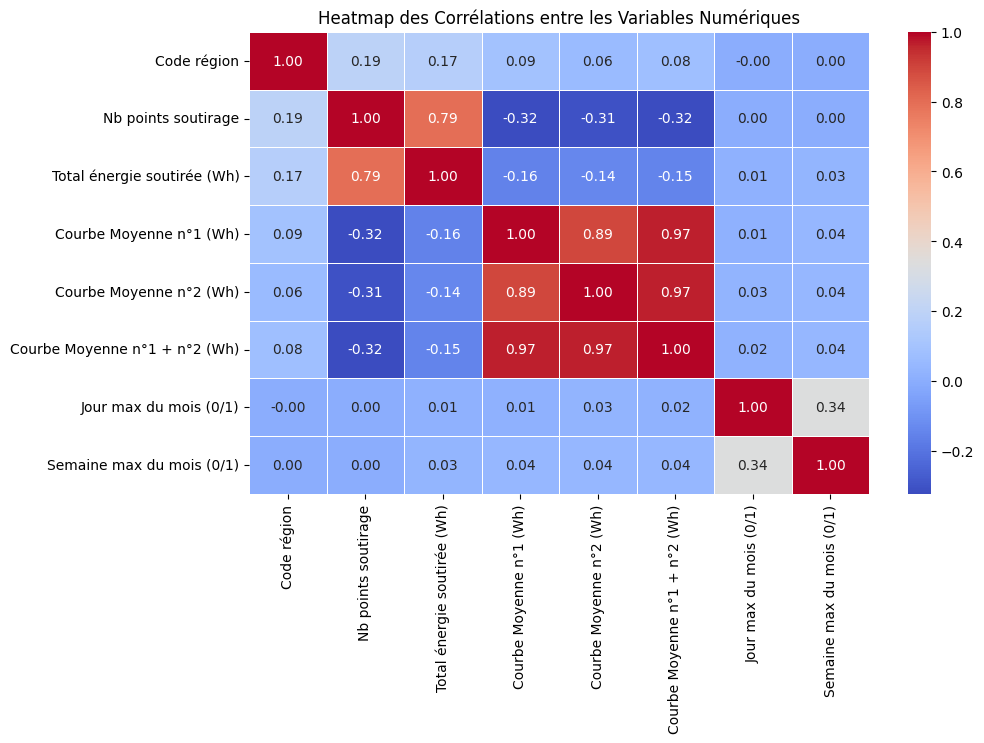

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


# Sélectionner uniquement les colonnes numériques
colonnes_numeriques = df_conso_clean.select_dtypes(include=['number'])

# Calculer la matrice de corrélation
matrice_correlation = colonnes_numeriques.corr()

plt.figure(figsize=(10, 6))  # Ajustez la taille si nécessaire
sns.heatmap(matrice_correlation, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Heatmap des Corrélations entre les Variables Numériques')
plt.show()


**Remarques**:

La colonee correlée avec Total energie : Nb de point de soutirage=> Graphique à faire et a voir si feature candidate pour ML aussi.

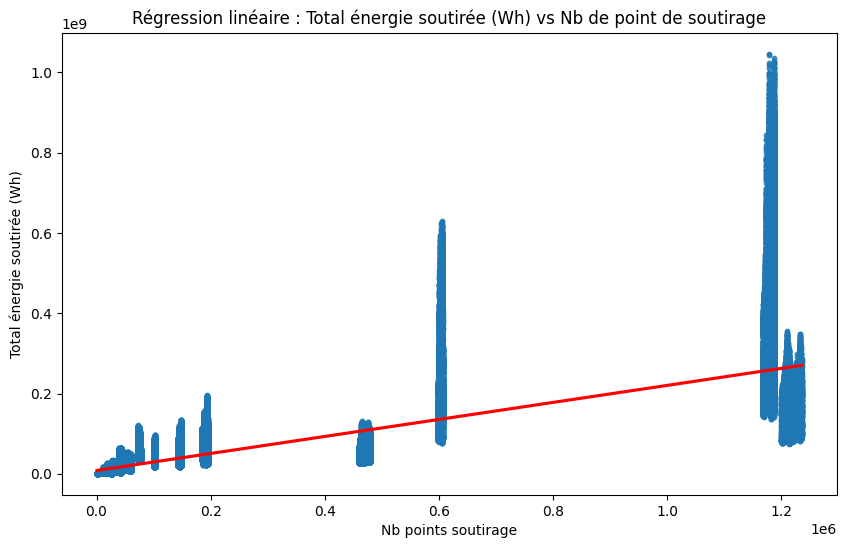

In [ ]:
# Graphique de régression entre Total énergie soutirée (Wh) et Nb de points de soutirage
plt.figure(figsize=(10, 6))
sns.regplot(x='Nb points soutirage', y='Total énergie soutirée (Wh)', data=df_conso_clean, scatter_kws={'s':10}, line_kws={'color':'red'})
plt.title('Régression linéaire : Total énergie soutirée (Wh) vs Nb de point de soutirage')
plt.xlabel('Nb points soutirage')
plt.ylabel('Total énergie soutirée (Wh)')
plt.show()


In [ ]:
correlation = df_conso_clean['Nb points soutirage'].corr(df_conso_clean['Total énergie soutirée (Wh)'])
print(f'Coefficient de corrélation : {correlation:.2f}')


Coefficient de corrélation : 0.79


## **HISTOGRAMME - Répartition de la consommation énergétique au fil du temps, par année, par mois.**

In [ ]:
# Ajouter des colonnes pour l'année et le mois

df_conso_clean['Horodate'] = pd.to_datetime(df_conso_clean['Horodate'])

df_conso_clean['Année'] = df_conso_clean['Horodate'].dt.year
df_conso_clean['Mois'] = df_conso_clean['Horodate'].dt.month


df_conso_clean['Année'].unique()


array([2024, 2023, 2022], dtype=int32)

In [ ]:
df_conso_clean.head()


,Horodate,Région,Code région,Profil,Nb points soutirage,Total énergie soutirée (Wh),Courbe Moyenne n°1 (Wh),Indice représentativité Courbe n°1 (%),Courbe Moyenne n°2 (Wh),Indice représentativité Courbe n°2 (%),Courbe Moyenne n°1 + n°2 (Wh),Indice représentativité Courbe n°1 + n°2 (%),Jour max du mois (0/1),Semaine max du mois (0/1),Année,Mois
0,2024-06-30 21:30:00+00:00,Hauts-de-France,32,PRO2 (+ PRO2WE + PRO6),77296,41993333.0,603.0,22,520.0,22,562.0,45,0,1,2024,6
1,2024-06-30 21:30:00+00:00,Hauts-de-France,32,PRO3,1308,1231020.0,990.0,33,941.0,33,903.0,67,0,1,2024,6
2,2024-06-30 21:30:00+00:00,Hauts-de-France,32,PRO4,2106,1137623.0,639.0,21,592.0,21,497.0,43,0,1,2024,6
3,2024-06-30 21:30:00+00:00,Hauts-de-France,32,PRO5,43133,42036175.0,824.0,42,771.0,41,798.0,84,0,1,2024,6
4,2024-06-30 21:30:00+00:00,Hauts-de-France,32,RES11 (+ RES11WE),195680,35677732.0,296.0,9,192.0,9,244.0,19,0,1,2024,6


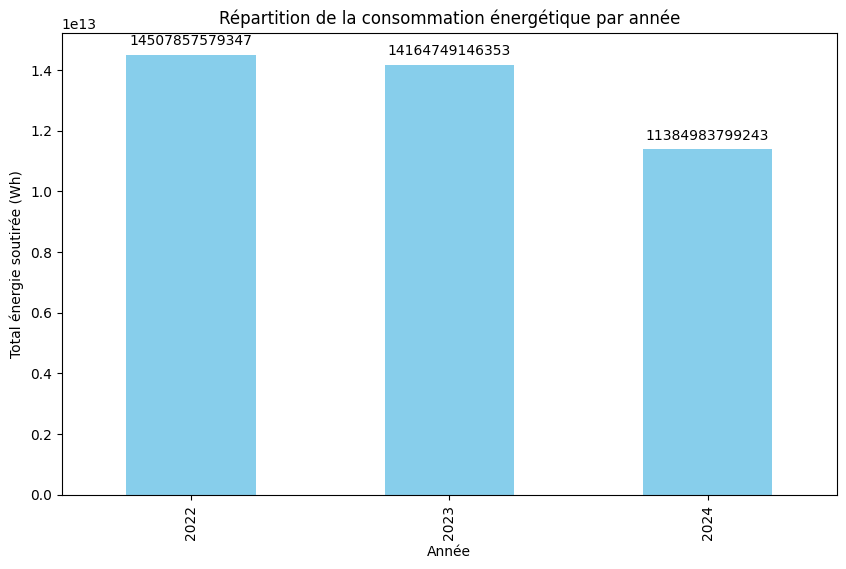

In [ ]:
plt.figure(figsize=(10, 6))
ax = df_conso_clean.groupby('Année')['Total énergie soutirée (Wh)'].sum().plot(kind='bar', color='skyblue')

# Ajouter les annotations des chiffres au-dessus des barres
for p in ax.patches:
    ax.annotate(f'{p.get_height():.0f}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center',
                xytext=(0, 10),
                textcoords='offset points')

plt.title('Répartition de la consommation énergétique par année')
plt.xlabel('Année')
plt.ylabel('Total énergie soutirée (Wh)')
plt.show()

Les années 2022 et 2024 n'etant pas complétes=> difficile d'analyser les tendances


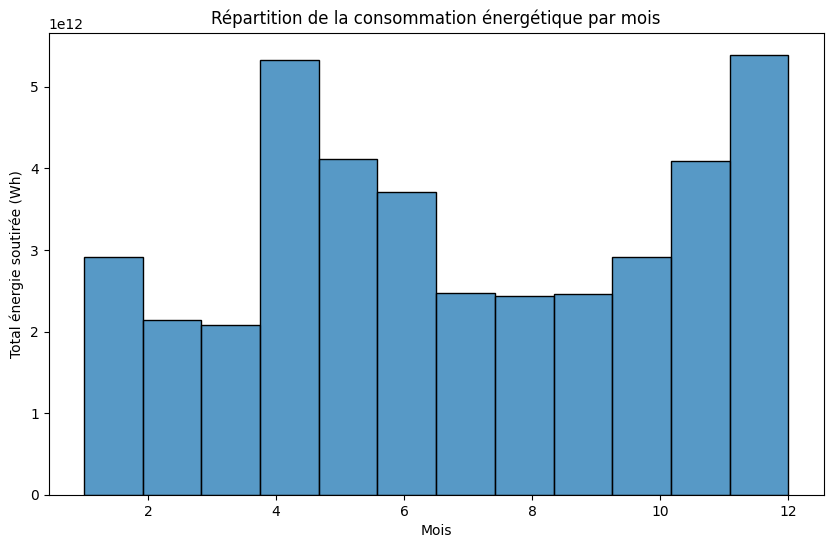

In [ ]:
# Répartition de la consommation énergétique par mois

plt.figure(figsize=(10, 6))
sns.histplot(data=df_conso_clean, x='Mois', weights='Total énergie soutirée (Wh)', bins=12, kde=False)
plt.title("Répartition de la consommation énergétique par mois")
plt.xlabel("Mois")
plt.ylabel("Total énergie soutirée (Wh)")
plt.show()

Les années 2022 et 2024 n'etant pas complétes=> difficile d'analyser les tendances


## **HISTOGRAMME - Comparaison des deux régions par total énergie soutirée**

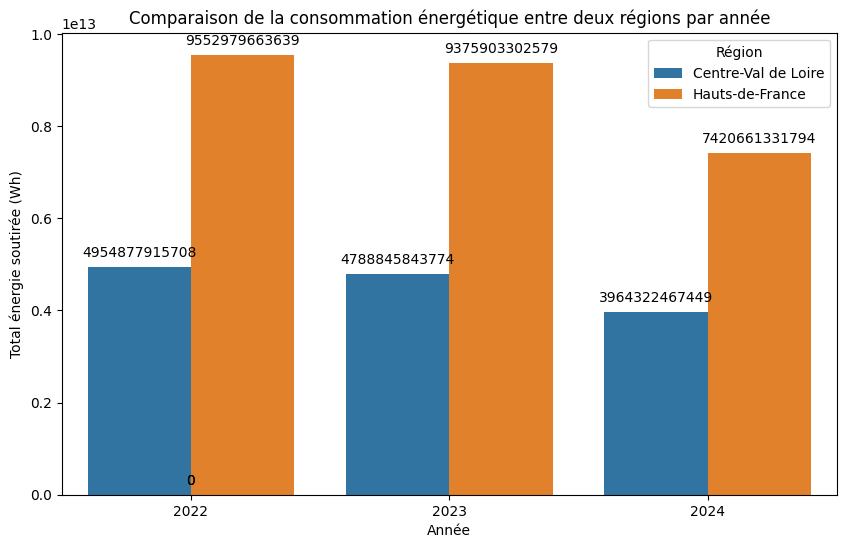

In [ ]:
# Créer l'histogramme pour comparer deux régions par année

# Filtrer les données pour les deux régions
df_two_regions = df_conso_clean[df_conso_clean['Région'].isin(['Hauts-de-France', 'Centre-Val de Loire'])]

# Grouper les données par région et par année
df_grouped_by_year = df_two_regions.groupby(['Année', 'Région'])['Total énergie soutirée (Wh)'].sum().reset_index()

# Créer l'histogramme
plt.figure(figsize=(10, 6))
ax = sns.barplot(x='Année', y='Total énergie soutirée (Wh)', hue='Région', data=df_grouped_by_year)

# Ajouter les annotations des chiffres au-dessus des barres
for p in ax.patches:
    ax.annotate(f'{p.get_height():.0f}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center',
                xytext=(0, 10),
                textcoords='offset points')

plt.title('Comparaison de la consommation énergétique entre deux régions par année')
plt.xlabel('Année')
plt.ylabel('Total énergie soutirée (Wh)')
plt.show()



Haut de France conso plus elevée que CVL

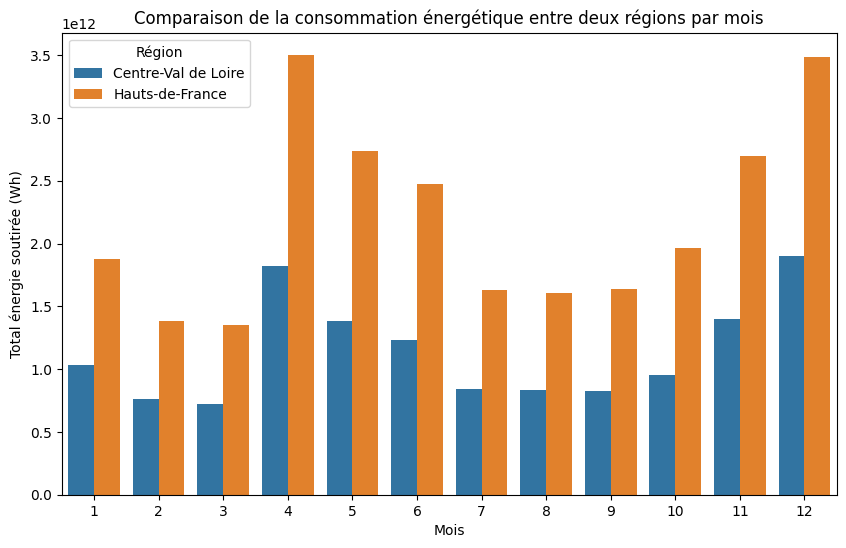

In [ ]:
# Créer l'histogramme pour comparer deux régions par mois

# Grouper les données par région et par mois
df_grouped_by_month = df_two_regions.groupby(['Mois', 'Région'])['Total énergie soutirée (Wh)'].sum().reset_index()

# Créer l'histogramme
plt.figure(figsize=(10, 6))
sns.barplot(x='Mois', y='Total énergie soutirée (Wh)', hue='Région', data=df_grouped_by_month)
plt.title('Comparaison de la consommation énergétique entre deux régions par mois')
plt.xlabel('Mois')
plt.ylabel('Total énergie soutirée (Wh)')
plt.show()


Printemps=> descente, Automne=> Augmentation

A voir avec le graphique par mois/par année pour eviter les années incomplètes

## **BOXPLOT - Etudier les outliers du total énergie soutirée**

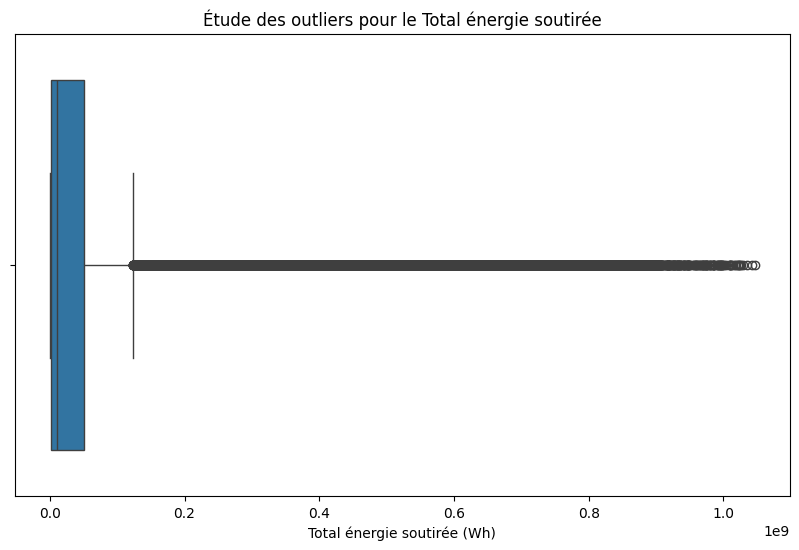

In [ ]:
# Etudier les outliers du total énergie soutirée

plt.figure(figsize=(10, 6))
sns.boxplot(x=df_conso_clean['Total énergie soutirée (Wh)'])
plt.title("Étude des outliers pour le Total énergie soutirée")
plt.xlabel("Total énergie soutirée (Wh)")
plt.show()

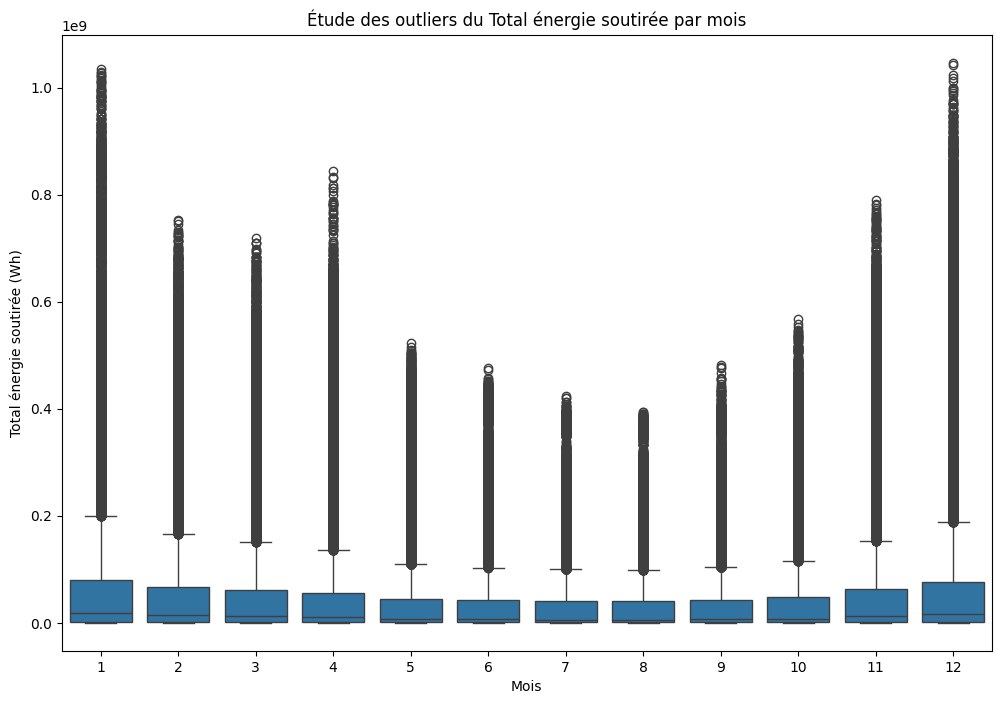

In [ ]:
# On peut affiner l'analyse pour voir les outliers par groupe Par exemple, pour visualiser les outliers par mois :

plt.figure(figsize=(12, 8))
sns.boxplot(x='Mois', y='Total énergie soutirée (Wh)', data=df_conso_clean)
plt.title("Étude des outliers du Total énergie soutirée par mois")
plt.xlabel("Mois")
plt.ylabel("Total énergie soutirée (Wh)")
plt.show()

## **CAMEMBERT (PIE CHART) - Etudier la proportion de chaque profil**

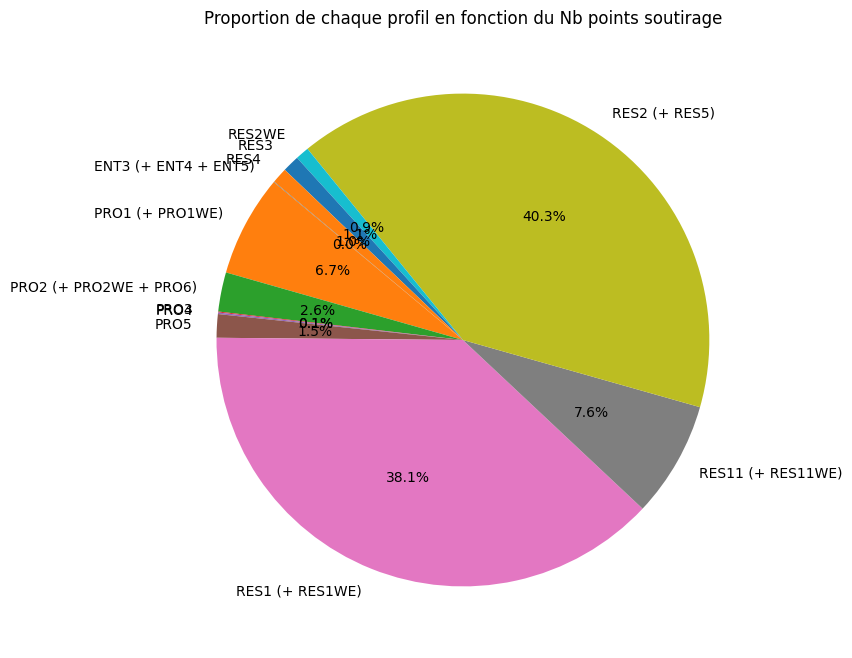

In [ ]:
# Étudier la proportion de chaque profil (Profil & Nb points soutirage)

# Grouper par profil et sommer les points de soutirage
profil_grouped = df_conso_clean.groupby('Profil')['Nb points soutirage'].sum()

# Créer le camembert
plt.figure(figsize=(8, 8))
plt.pie(profil_grouped, labels=profil_grouped.index, autopct='%1.1f%%', startangle=140)
plt.title('Proportion de chaque profil en fonction du Nb points soutirage')
plt.show()


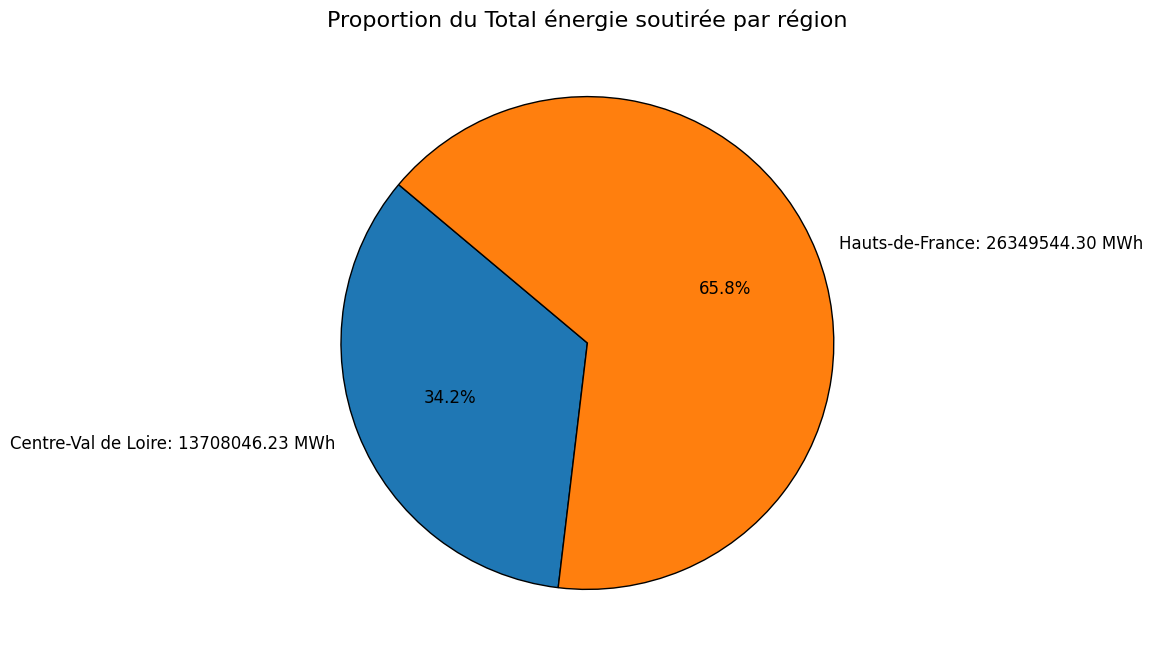

In [ ]:
import matplotlib.pyplot as plt

# Grouper par région et sommer l'énergie soutirée
region_grouped = df_conso_clean.groupby('Région')['Total énergie soutirée (Wh)'].sum()

# Créer les labels incluant les valeurs absolues
labels = [f'{region}: {value/1e6:.2f} MWh' for region, value in zip(region_grouped.index, region_grouped.values)]

# Créer le camembert avec les valeurs et les pourcentages
plt.figure(figsize=(8, 8))
plt.pie(region_grouped, labels=labels, autopct='%1.1f%%', startangle=140,
        wedgeprops={'edgecolor': 'black'}, textprops={'fontsize': 12})

plt.title('Proportion du Total énergie soutirée par région', fontsize=16)
plt.show()


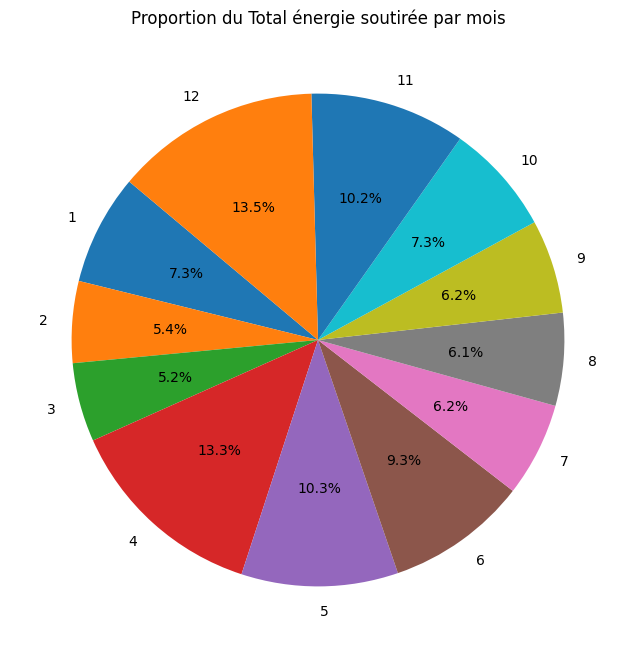

In [ ]:
#  Étudier la proportion de Total énergie soutirée par mois

# Extraire le mois
df_conso_clean['Mois'] = df_conso_clean['Horodate'].dt.month

# Grouper par mois et sommer l'énergie soutirée
month_grouped = df_conso_clean.groupby('Mois')['Total énergie soutirée (Wh)'].sum()

# Créer le camembert
plt.figure(figsize=(8, 8))
plt.pie(month_grouped, labels=month_grouped.index, autopct='%1.1f%%', startangle=140)
plt.title('Proportion du Total énergie soutirée par mois')
plt.show()


## **CAMEMBERT (PIE CHART) - total energie avec mention du Nb de points de soutirage par région**

In [ ]:
import plotly.express as px

# Grouper les données par région pour obtenir la somme de la Total énergie et le nombre de points de soutirage
df_grouped_pie = df_conso_clean.groupby('Région')[['Total énergie soutirée (Wh)', 'Nb points soutirage']].sum().reset_index()

# Créer le camembert avec la Total énergie soutirée et mention du Nb de points de soutirage dans le hover

fig = px.pie(df_grouped_pie,
             names='Région',
             values='Total énergie soutirée (Wh)',
             hover_data=['Nb points soutirage'],
             title='Répartition de la Total énergie soutirée par Région',
             labels={'Total énergie soutirée (Wh)': 'Énergie (Wh)'})

# Ajouter un formatage au hover pour afficher le nombre de points de soutirage
fig.update_traces(textinfo='percent+label',
                  hovertemplate='<b>%{label}</b><br>Total énergie: %{value:,} Wh<br>Nb points de soutirage: %{customdata[0]:,}')

# Affichage du graphique
fig.show()


In [ ]:
import plotly.express as px

# Grouper les données par mois pour obtenir la somme de la Total énergie soutirée et le nombre de points de soutirage
df_grouped_pie_month = df_conso_clean.groupby('Mois')[['Total énergie soutirée (Wh)', 'Nb points soutirage']].sum().reset_index()

# Créer le camembert avec la Total énergie soutirée et mention du Nb de points de soutirage dans le hover
fig_month = px.pie(df_grouped_pie_month,
                   names='Mois',
                   values='Total énergie soutirée (Wh)',
                   hover_data=['Nb points soutirage'],
                   title='Répartition de la Total énergie soutirée par Mois',
                   labels={'Total énergie soutirée (Wh)': 'Énergie (Wh)'})

# Ajouter un formatage au hover pour afficher le nombre de points de soutirage
fig_month.update_traces(textinfo='percent+label',
                        hovertemplate='<b>%{label}</b><br>Total énergie: %{value:,} Wh<br>Nb points de soutirage: %{customdata[0]:,}')

# Affichage du graphique
fig_month.show()


A differencier para mois et para année (car années incompletes)

## **LINE PLOT - Comparaison entre les courbes moyenne (n1 VS n2 VS n1+n2) des deux régions**

In [ ]:
import plotly.express as px

# Filtrer les données pour les deux régions
df_two_regions = df_conso_clean[df_conso_clean['Région'].isin(['Hauts-de-France', 'Centre-Val de Loire'])]

# Grouper les données par année, région, et courbe moyenne
df_grouped_by_year = df_two_regions.groupby(['Année', 'Région'])[['Courbe Moyenne n°1 (Wh)', 'Courbe Moyenne n°2 (Wh)', 'Courbe Moyenne n°1 + n°2 (Wh)']].mean().reset_index()

# Tracer les courbes moyennes avec des popups
fig = px.line(df_grouped_by_year, x='Année', y='Courbe Moyenne n°1 (Wh)', color='Région', markers=True,
              hover_data={'Année': True, 'Courbe Moyenne n°1 (Wh)': True, 'Région': True},
              title='Courbe Moyenne n°1 (Wh) par Année et Région')

# Ajouter manuellement la courbe pour Courbe Moyenne n°1 (Wh)
fig.add_scatter(x=df_grouped_by_year['Année'], y=df_grouped_by_year['Courbe Moyenne n°1 (Wh)'],
                mode='lines+markers', name='Courbe Moyenne n°1 (Wh)', hovertext=df_grouped_by_year['Région'],
                line=dict(dash='solid'))  # Ligne solide pour Courbe Moyenne n°1

# Ajouter la courbe pour Courbe Moyenne n°2 (Wh)
fig.add_scatter(x=df_grouped_by_year['Année'], y=df_grouped_by_year['Courbe Moyenne n°2 (Wh)'],
                mode='lines+markers', name='Courbe Moyenne n°2 (Wh)', hovertext=df_grouped_by_year['Région'],
                line=dict(dash='dash'))  # Ligne pointillée pour Courbe Moyenne n°2

# Ajouter la courbe pour Courbe Moyenne n°1 + n°2 (Wh)
fig.add_scatter(x=df_grouped_by_year['Année'], y=df_grouped_by_year['Courbe Moyenne n°1 + n°2 (Wh)'],
                mode='lines+markers', name='Courbe Moyenne n°1 + n°2 (Wh)', hovertext=df_grouped_by_year['Région'],
                line=dict(dash='dot'))  # Ligne pointillée alternée pour Courbe Moyenne n°1 + n°2

# Mise à jour du layout
fig.update_layout(
    title='Comparaison des Courbes Moyennes par Année entre Deux Régions',
    xaxis_title='Année',
    yaxis_title='Valeur Moyenne (Wh)',
    legend_title='Région',
    hovermode='x unified'  # Pour afficher toutes les valeurs pour une année
)

# Affichage
fig.show()


Legende à completer avec Courbe 1, Courbe2, Courbe 1+2

Porquoi la moyenne baisse en 2023 ???


In [ ]:
import plotly.express as px

# Filtrer les données pour les deux régions
df_two_regions = df_conso_clean[df_conso_clean['Région'].isin(['Hauts-de-France', 'Centre-Val de Loire'])]

# Grouper les données par mois, région, et courbe moyenne
df_grouped_by_month = df_two_regions.groupby(['Mois', 'Région'])[['Courbe Moyenne n°1 (Wh)', 'Courbe Moyenne n°2 (Wh)', 'Courbe Moyenne n°1 + n°2 (Wh)']].mean().reset_index()

# Tracer les courbes moyennes avec des popups
fig = px.line(df_grouped_by_month, x='Mois', y='Courbe Moyenne n°1 (Wh)', color='Région', markers=True,
              hover_data={'Mois': True, 'Courbe Moyenne n°1 (Wh)': True, 'Région': True},
              title='Courbe Moyenne n°1 (Wh) par Mois et Région')

# Ajouter la courbe manuellement pour Courbe Moyenne n°1 (Wh) si besoin
fig.add_scatter(x=df_grouped_by_month['Mois'], y=df_grouped_by_month['Courbe Moyenne n°1 (Wh)'],
                mode='lines+markers', name='Courbe Moyenne n°1 (Wh)', hovertext=df_grouped_by_month['Région'],
                line=dict(dash='solid'))  # Ligne solide pour Courbe Moyenne n°1

# Ajouter les autres courbes
fig.add_scatter(x=df_grouped_by_month['Mois'], y=df_grouped_by_month['Courbe Moyenne n°2 (Wh)'],
                mode='lines+markers', name='Courbe Moyenne n°2 (Wh)', hovertext=df_grouped_by_month['Région'],
                line=dict(dash='dash'))  # Ligne pointillée pour Courbe Moyenne n°2

fig.add_scatter(x=df_grouped_by_month['Mois'], y=df_grouped_by_month['Courbe Moyenne n°1 + n°2 (Wh)'],
                mode='lines+markers', name='Courbe Moyenne n°1 + n°2 (Wh)', hovertext=df_grouped_by_month['Région'],
                line=dict(dash='dot'))  # Ligne pointillée alternée pour Courbe Moyenne n°1 + n°2

# Mise à jour du layout
fig.update_layout(
    title='Comparaison des Courbes Moyennes par Mois entre Deux Régions',
    xaxis_title='Mois',
    yaxis_title='Valeur Moyenne (Wh)',
    legend_title='Région',
    hovermode='x unified'  # Pour montrer toutes les valeurs pour un même mois
)

# Affichage
fig.show()

## **HISTOGRAMME - Comparer la consommation le meme mois entre les differentes années**

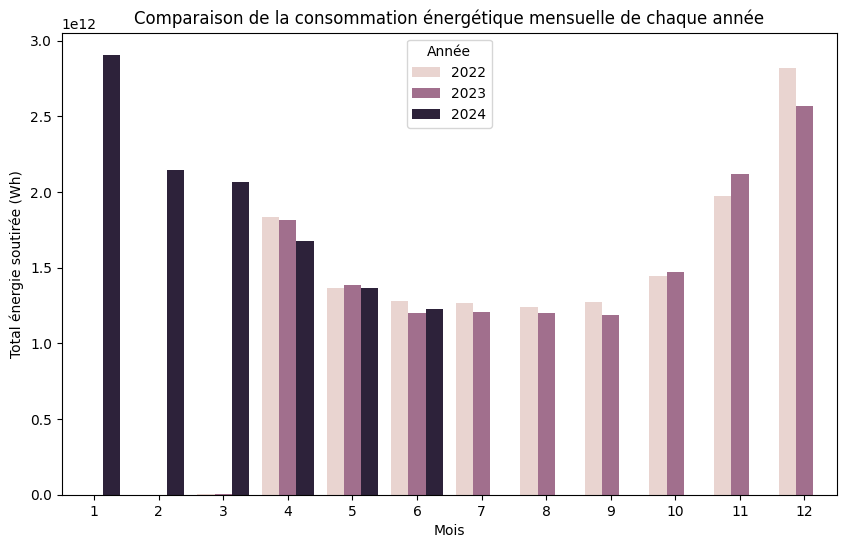

In [ ]:
# Créer l'histogramme pour comparer la consommation par mois de chaque année

# Grouper les données par année et par mois
df_grouped_by_month_year = df_two_regions.groupby(['Mois', 'Année'])['Total énergie soutirée (Wh)'].sum().reset_index()

# Créer l'histogramme
plt.figure(figsize=(10, 6))
sns.barplot(x='Mois', y='Total énergie soutirée (Wh)', hue='Année', data=df_grouped_by_month_year)
plt.title('Comparaison de la consommation énergétique mensuelle de chaque année')
plt.xlabel('Mois')
plt.ylabel('Total énergie soutirée (Wh)')
plt.show()

ANALYSE : les années sont incomplètes (mettre à jour une fois que 2022 et 2023 sont complètes pour pouvoir comparer les années)

## **BOXPLOT - Etudier les outliers de l'énergie soutirée par année**


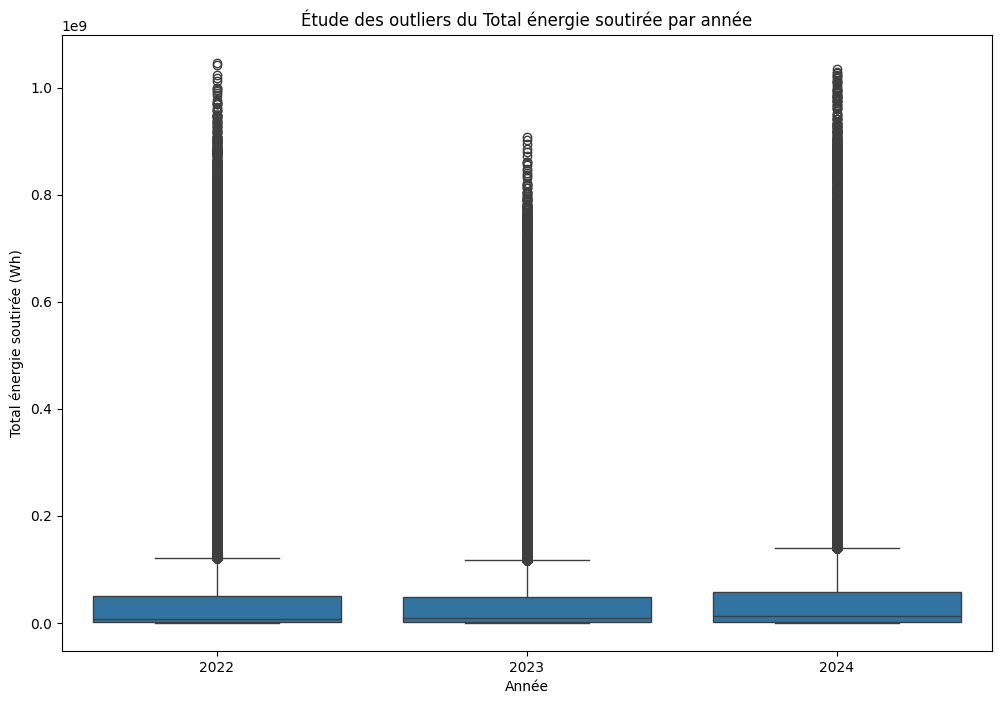

In [ ]:
# On peut affiner l'analyse pour comparer les outliers par année :

plt.figure(figsize=(12, 8))
sns.boxplot(x='Année', y='Total énergie soutirée (Wh)', data=df_conso_clean)
plt.title("Étude des outliers du Total énergie soutirée par année")
plt.xlabel("Année")
plt.ylabel("Total énergie soutirée (Wh)")
plt.show()

ANALYSE : les années sont incomplètes (mettre à jour une fois que 2022 et 2023 sont complètes pour pouvoir comparer les années)

## **BOXPLOT - Etudier les outliers de l'énergie soutirée par région**

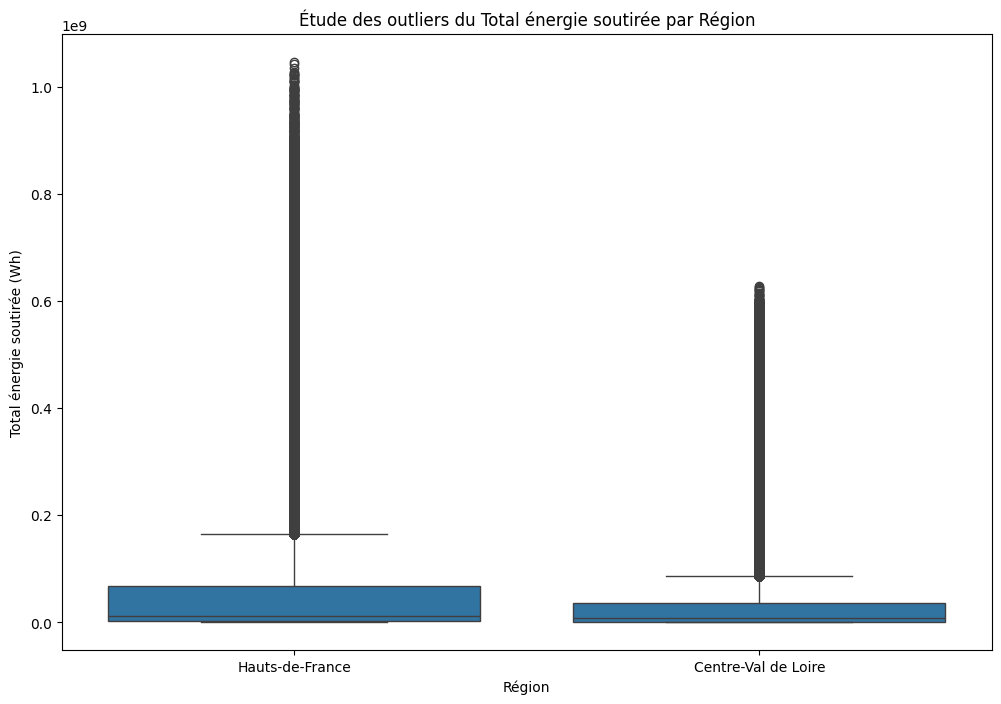

In [ ]:
# On peut affiner l'analyse pour comparer les outliers par région :

plt.figure(figsize=(12, 8))
sns.boxplot(x='Région', y='Total énergie soutirée (Wh)', data=df_conso_clean)
plt.title("Étude des outliers du Total énergie soutirée par Région")
plt.xlabel("Région")
plt.ylabel("Total énergie soutirée (Wh)")
plt.show()

ANALYSE : la distribution de la consommation des Hauts de France est plus dispersée que celle de Centre Val de Loire mais la médiane de ces 2 régions est à peu près la même

## **HISTOGRAMME - Etudier la proportion de chaque profil par région**

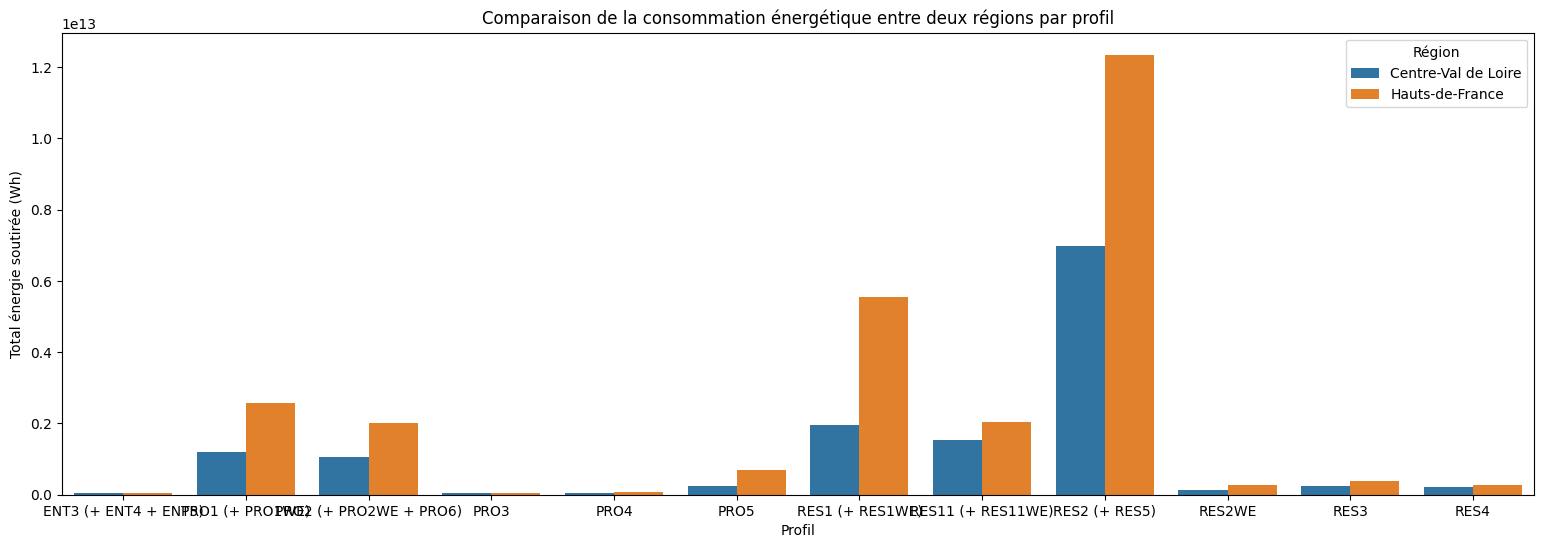

In [ ]:
# Créer l'histogramme pour comparer la proportion de chaque profil par région

# Grouper les données par région et par profil
df_grouped_by_profil_region = df_two_regions.groupby(['Profil', 'Région'])['Total énergie soutirée (Wh)'].sum().reset_index()

# Créer l'histogramme
plt.figure(figsize=(19, 6))
sns.barplot(x='Profil', y='Total énergie soutirée (Wh)', hue='Région', data=df_grouped_by_profil_region)
plt.title('Comparaison de la consommation énergétique entre deux régions par profil')
plt.xlabel('Profil')
plt.ylabel('Total énergie soutirée (Wh)')
plt.show()


ANALYSE : La consommation de la région HDF est plus importante que celle de CVL.Les profils (RES1 + RES1 WE) et (RES2 + RES5) sont ceux qui consomment le plus.